# COMP1800 - Data Visualization (Coursework)
<u>Introduction</u>: The task embarked upon involves a comprehensive analysis of ChrisCo, a fictional cinema chain in the UK, through the lens of data visualization. The process entails compiling and examining data to glean insights into the company's operations, customer demographics, and financial performance. This Jupyter Notebook outlines the steps taken and achievements made using Python, specifically within a Visual Studio Code environment.

#### Setting Up a Python Environment

Setting up a dedicated Python environment is essential for managing dependencies in data science projects. You can use either Anaconda or Miniconda for this purpose.

**Creating and Activating a New Environment**:


```bash
conda create --name COMP1800-DV python=3.10.10
conda activate COMP1800-DV
```


#### Installing Required Packages

Ensure all necessary packages are installed by using a `pip install` command that references a [`requirements.txt`](../Docs/requirements.txt) file. This file lists all packages needed to run the Jupyter notebook effectively.

**Installing and Updating Packages**:
```python
%pip install --upgrade -r ../Docs/requirements.txt --quiet
```
Note that the `--quiet` flag is used to suppress any unnecessary output from package installation, which can make it easier to see when there are errors.

**Setting Up an IPython Kernel for Jupyter**:

To use the new Python environment in Jupyter, install a new IPython kernel with the environment.


```bash
python -m ipykernel install --user --name=COMP1800-DV --display-name "COMP1800-DV(IPYNB)"
conda install -n COMP1800-DV ipykernel --update-deps --force-reinstall
```


This creates a kernel named `COMP1800-DV` for Jupyter, ensuring it uses the specific Python environment created for this coursework.

In [140]:
%pip install --upgrade -r ../Docs/requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries
Importing necessary libraries needed for the this coursework.

In [141]:
try:
    import hvplot.pandas
    import squarify
    import panel as pn
    import pandas as pd
    import numpy as np
    import colorcet as cc
    import seaborn as sns
    import plotly.express as px
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    import matplotlib.dates as mdates
    import plotly.graph_objects as go
    from scipy import stats
    from statsmodels.tsa.seasonal import seasonal_decompose
    from scipy.stats import linregress

    sns.set_theme(style="whitegrid")
except Exception as e:
    print(f"Error : {e}")

# Data Collection
Access and download the specific datasets from the provided links by replacing 'ID' with student ID number.

**Downloading  Datasets**:
```python
%run ../Datasets/download.py
```

This will download the datasets specified in coursework specificatiom into the 'Datasets' directory specified by the `directory` variable in [`download.py`](../Datasets/download.py).

In [142]:
%run ../Datasets/download.py

Downloaded and saved CinemaWeeklyVisitors.csv successfully.
Downloaded and saved CinemaAge.csv successfully.
Downloaded and saved CinemaCapacity.csv successfully.
Downloaded and saved CinemaMarketing.csv successfully.
Downloaded and saved CinemaOverheads.csv successfully.
Downloaded and saved CinemaSpend.csv successfully.


## Loading and Inspecting the Dataset
Datasets spanning weekly visitors, cinema ages, capacities, marketing expenditures, overheads, and customer spend were meticulously gathered and loaded for subsequent analysis.

In [143]:
directory = '../Datasets/'
age_df = pd.read_csv(f'{directory}CinemaAge.csv')
capacity_df = pd.read_csv(f'{directory}CinemaCapacity.csv')
marketing_df = pd.read_csv(f'{directory}CinemaMarketing.csv')
overheads_df = pd.read_csv(f'{directory}CinemaOverheads.csv')
spend_df = pd.read_csv(f'{directory}CinemaSpend.csv')
weekly_visitors_df = pd.read_csv(f'{directory}CinemaWeeklyVisitors.csv')

display(age_df.head(), capacity_df.head(), marketing_df.head(), overheads_df.head(), spend_df.head(), weekly_visitors_df.head())

,Id,Avg age (yrs)
0,UDD,27
1,CCX,38
2,VJV,41
3,WVA,45
4,AKA,26


,Id,Seating capacity
0,UDD,163
1,CCX,30
2,VJV,449
3,WVA,181
4,AKA,43


,Id,Marketing (£000s)
0,UDD,5
1,CCX,2
2,VJV,13
3,WVA,24
4,AKA,2


,Id,Overheads (£000s)
0,UDD,65
1,CCX,18
2,VJV,87
3,WVA,58
4,AKA,13


,Id,Avg spend (£)
0,UDD,15
1,CCX,19
2,VJV,15
3,WVA,15
4,AKA,12


,Date,UDD,CCX,VJV,WVA,AKA,JJQ,SJE,WQW,ZWY,...,TJN,TPY,TVJ,SDT,WKL,CWN,XQE,VPG,YCI,RPQ
0,2019-01-01,372,0,845,923,0,163,314,160,191,...,411,436,224,0,109,0,177,927,141,326
1,2019-01-08,378,0,1012,725,0,148,303,195,165,...,442,444,342,0,123,0,160,714,125,252
2,2019-01-15,360,0,944,1174,0,151,332,183,120,...,478,517,321,0,135,0,164,902,131,402
3,2019-01-22,347,0,905,796,0,152,319,199,137,...,505,406,231,0,110,0,212,901,129,265
4,2019-01-29,387,0,975,857,0,147,301,183,146,...,486,415,262,0,128,0,157,887,136,295


---
## Data Merging and Status Determination for Cinemas

This code snippet performs multiple data preparation and analysis tasks. Initially, it merges various cinema-related datasets (`age_df`, `capacity_df`, `marketing_df`, `overheads_df`, `spend_df`) on a common identifier (`Id`) to create a comprehensive `summary_df` containing details like average age, seating capacity, marketing spend, overheads, and average spend for each cinema. It transforms `weekly_visitors_df` into `customer_df` to keep track of weekly visitors per cinema, converting dates into the datetime format for accurate temporal analysis.

Subsequent operations determine the start and end dates of cinema operations based on visitor data, facilitating the distinction between currently operating ("Running") and previously closed ("Closed") cinemas. The `summary_df` is augmented with this temporal information and the operational status of each cinema, enabling a granular view of cinema lifecycles. The output segments display the first few rows of `summary_df` and `customer_df`, followed by examples of running and closed cinemas, showcasing the practical application of pandas for data merging, manipulation, and conditional logic application within a cinema context.

In [144]:
summary_df = pd.merge(age_df, capacity_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, marketing_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, overheads_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, spend_df, on='Id', how='inner')

summary_df.columns = ['Cinema ID', 'Average Age (Years)', 'Seating Capacity', 'Marketing Spend (£000s)', 'Overheads (£000s)', 'Average Spend (£)']

customer_df = weekly_visitors_df.melt(id_vars=["Date"], var_name="Cinema ID", value_name="Weekly Visitors")

customer_df['Date'] = pd.to_datetime(customer_df['Date'])

actual_start_dates = customer_df[customer_df['Weekly Visitors'] > 0].groupby('Cinema ID')['Date'].min().rename('Start Date')

end_dates = customer_df[customer_df['Weekly Visitors'] > 0].groupby('Cinema ID')['Date'].max().rename('End Date')

summary_df = summary_df.merge(actual_start_dates, on='Cinema ID')
summary_df = summary_df.merge(end_dates, on='Cinema ID')

last_date = customer_df['Date'].max()
summary_df['Status'] = np.where(summary_df['End Date'] == last_date, 'Running', 'Closed')

print("Summary DataFrame:")
display(summary_df.head())

print("Customer DataFrame:")
display(customer_df.head())

print("Running Cinemas:")
display(summary_df[summary_df['Status'] == 'Running'].head())

print("Closed Cinemas:")
display(summary_df[summary_df['Status'] == 'Closed'].head())

Summary DataFrame:


,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£),Start Date,End Date,Status
0,UDD,27,163,5,65,15,2019-01-01,2022-12-27,Running
1,CCX,38,30,2,18,19,2021-01-05,2022-12-27,Running
2,VJV,41,449,13,87,15,2019-01-01,2022-12-27,Running
3,WVA,45,181,24,58,15,2019-01-01,2022-12-27,Running
4,AKA,26,43,2,13,12,2020-01-07,2022-12-20,Closed


Customer DataFrame:


,Date,Cinema ID,Weekly Visitors
0,2019-01-01,UDD,372
1,2019-01-08,UDD,378
2,2019-01-15,UDD,360
3,2019-01-22,UDD,347
4,2019-01-29,UDD,387


Running Cinemas:


,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£),Start Date,End Date,Status
0,UDD,27,163,5,65,15,2019-01-01,2022-12-27,Running
1,CCX,38,30,2,18,19,2021-01-05,2022-12-27,Running
2,VJV,41,449,13,87,15,2019-01-01,2022-12-27,Running
3,WVA,45,181,24,58,15,2019-01-01,2022-12-27,Running
5,JJQ,37,105,3,17,14,2019-01-01,2022-12-27,Running


Closed Cinemas:


,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£),Start Date,End Date,Status
4,AKA,26,43,2,13,12,2020-01-07,2022-12-20,Closed
12,ZQL,41,30,2,93,22,2019-01-01,2020-12-29,Closed
17,BWF,29,30,2,22,13,2019-01-01,2020-12-29,Closed


---
## Exploratory Data Analysis
**Exploratory Data Analysis (EDA)**: This code block provides an extensive Exploratory Data Analysis (EDA) for cinema data. It begins with descriptive statistics for both summary and customer data, highlighting measures like mean, count, and standard deviation, followed by a correlation matrix for numerical columns in `summary_df` to understand relationships between variables.

### Understanding Correlation Values:
- **1 or -1**: A correlation of 1 indicates a perfect positive linear relationship between two variables, while -1 indicates a perfect negative linear relationship. This means that as one variable increases, the other variable either increases (in the case of 1) or decreases (in the case of -1) in a perfectly linear fashion.
- **0**: A correlation of 0 means there is no linear relationship between the variables.
- **Values between 0 and ±1**: These indicate the strength and direction of a linear relationship between the variables. Values closer to 1 or -1 signify stronger relationships.

Summary DataFrame Descriptive Statistics:


,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£),Start Date,End Date
count,30.000000,30.000000,30.000000,30.000000,30.000000,30,30
mean,35.333333,116.433333,6.633333,63.733333,16.333333,2019-05-28 11:12:00,2022-11-08 05:36:00
min,26.000000,30.000000,1.000000,13.000000,8.000000,2019-01-01 00:00:00,2020-12-29 00:00:00
25%,29.250000,37.750000,2.000000,49.250000,13.000000,2019-01-01 00:00:00,2022-12-27 00:00:00
50%,36.000000,88.000000,5.000000,67.500000,15.000000,2019-01-01 00:00:00,2022-12-27 00:00:00
75%,41.000000,161.500000,7.750000,85.500000,20.750000,2019-01-01 00:00:00,2022-12-27 00:00:00
max,45.000000,449.000000,35.000000,99.000000,25.000000,2022-01-11 00:00:00,2022-12-27 00:00:00
std,6.503757,102.277069,7.246799,27.406183,4.837592,NaN,NaN


Customer DataFrame Descriptive Statistics:


,Date,Weekly Visitors
count,6270,6270.000000
mean,2020-12-29 00:00:00.000000256,293.387081
min,2019-01-01 00:00:00,0.000000
25%,2019-12-31 00:00:00,125.000000
50%,2020-12-29 00:00:00,176.000000
75%,2021-12-28 00:00:00,380.000000
max,2022-12-27 00:00:00,1492.000000
std,NaN,293.733774



Correlation Matrix:


,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
Average Age (Years),1.000000,0.037670,0.200223,-0.069903,0.595856
Seating Capacity,0.037670,1.000000,0.700083,0.286457,-0.139132
Marketing Spend (£000s),0.200223,0.700083,1.000000,0.116860,0.023279
Overheads (£000s),-0.069903,0.286457,0.116860,1.000000,-0.231567
Average Spend (£),0.595856,-0.139132,0.023279,-0.231567,1.000000


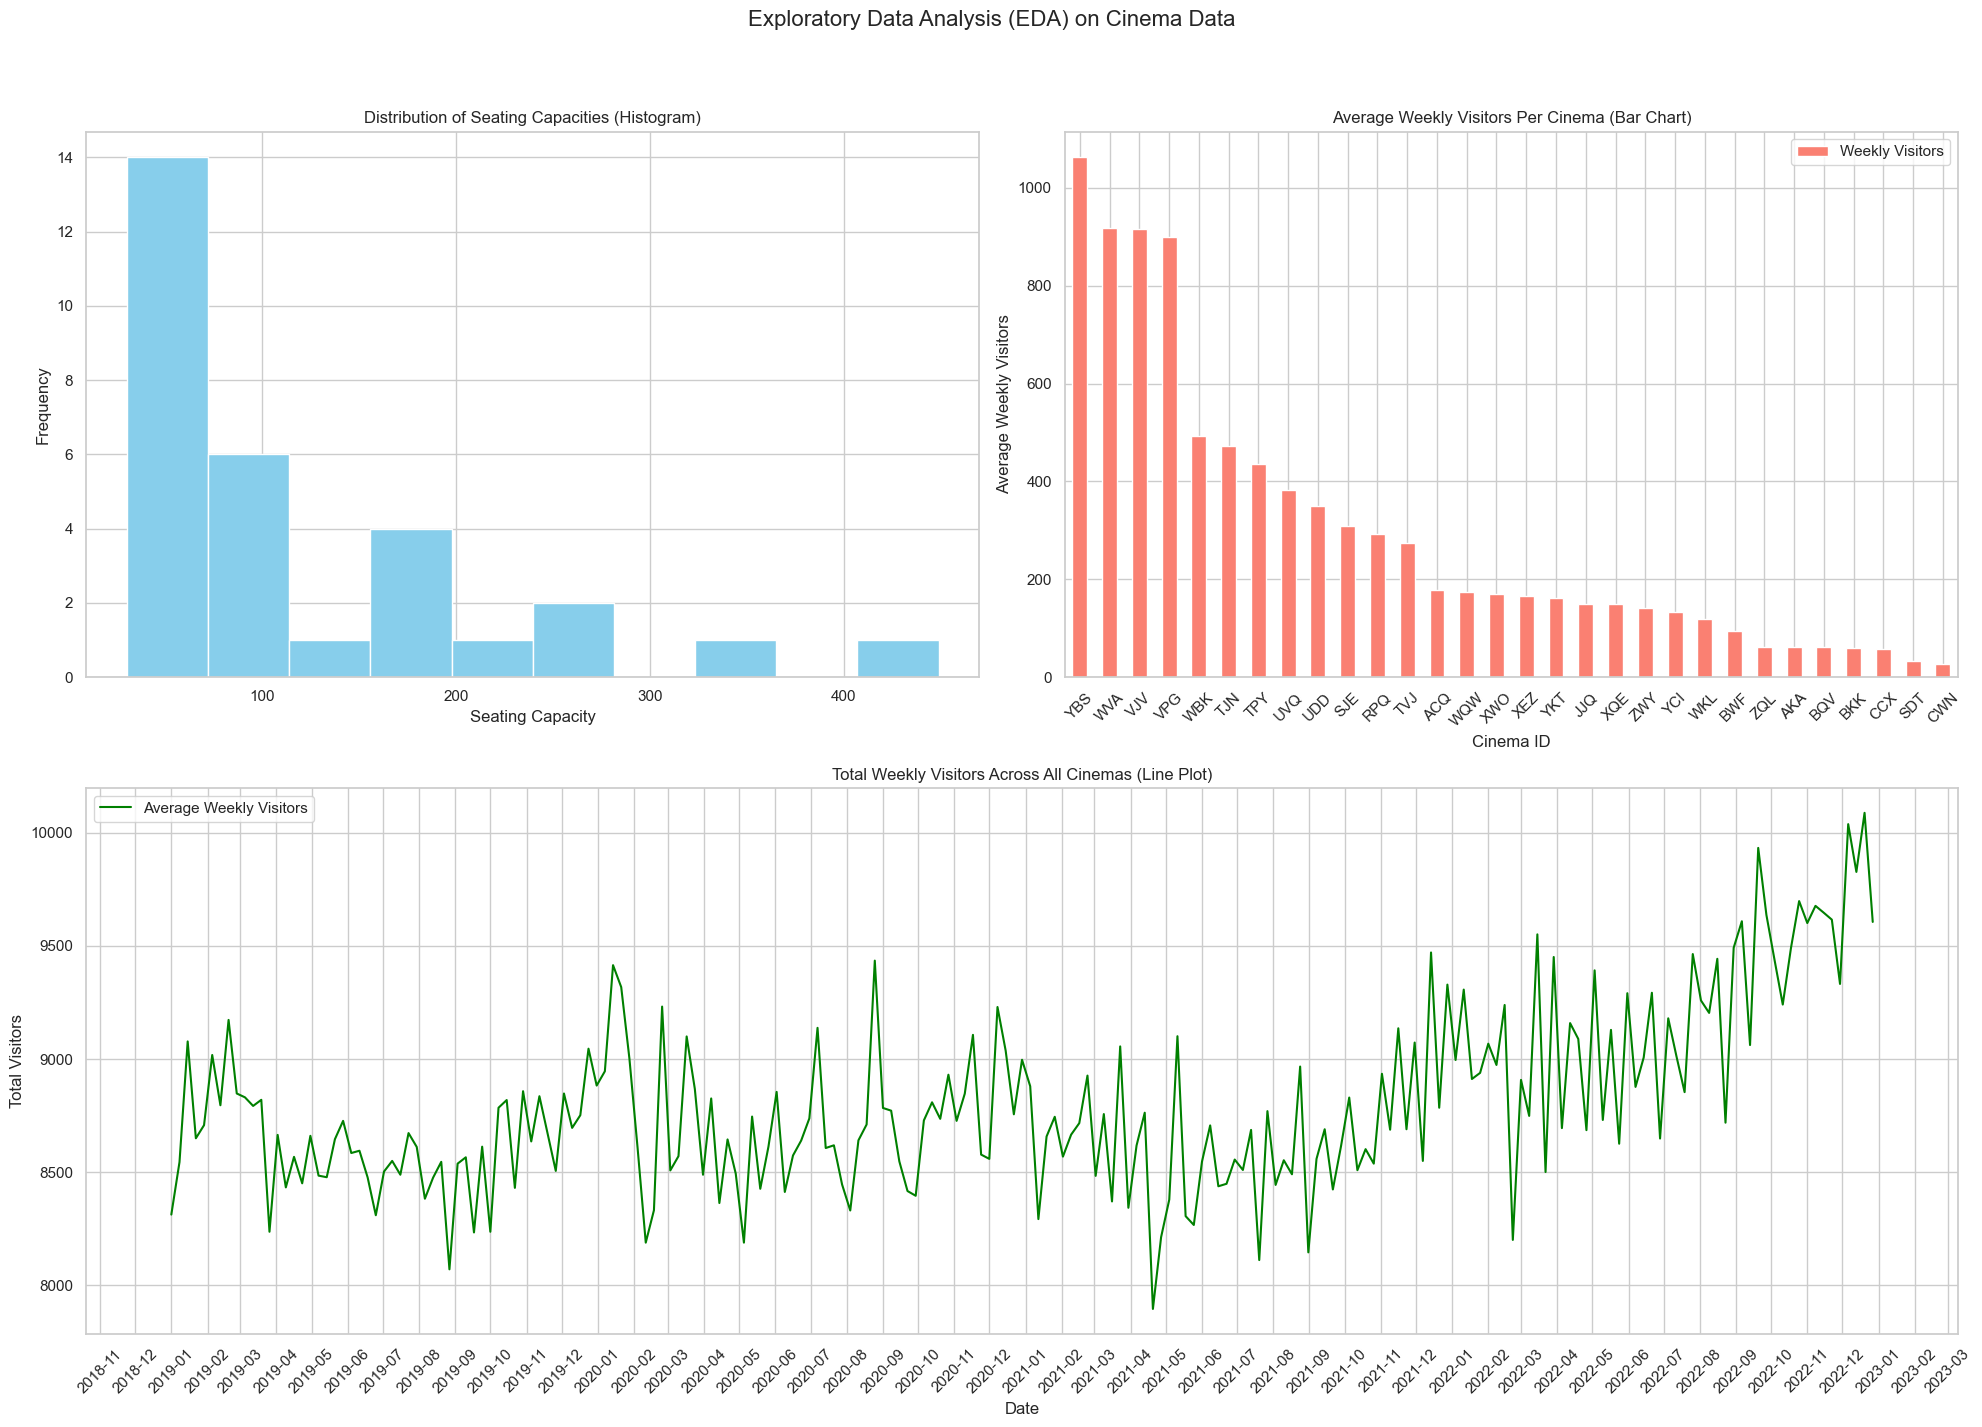

In [145]:
print("Summary DataFrame Descriptive Statistics:")
display(summary_df.describe())

print("Customer DataFrame Descriptive Statistics:")
display(customer_df.describe())

numeric_cols_summary_df = summary_df.select_dtypes(include=['float64', 'int64'])
print("\nCorrelation Matrix:")
display(numeric_cols_summary_df.corr())

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[3, 3])
fig.suptitle('Exploratory Data Analysis (EDA) on Cinema Data', fontsize=16)

ax0 = fig.add_subplot(gs[0, 0])
summary_df['Seating Capacity'].hist(color='skyblue')
ax0.set_title('Distribution of Seating Capacities (Histogram)')
ax0.set_xlabel('Seating Capacity')
ax0.set_ylabel('Frequency')

ax1 = fig.add_subplot(gs[0, 1])
average_visits_per_cinema = customer_df.groupby('Cinema ID')['Weekly Visitors'].mean()
average_visits_per_cinema = average_visits_per_cinema.sort_values(ascending=False)
average_visits_per_cinema.plot(kind='bar', color='salmon')
ax1.set_title('Average Weekly Visitors Per Cinema (Bar Chart)')
ax1.set_xlabel('Cinema ID')
ax1.set_ylabel('Average Weekly Visitors')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

ax2 = fig.add_subplot(gs[1, :])
total_visitors_per_week = customer_df.groupby('Date')['Weekly Visitors'].sum()
ax2.plot(total_visitors_per_week.index, total_visitors_per_week.values, label='Average Weekly Visitors', color='green')
ax2.set_title('Total Weekly Visitors Across All Cinemas (Line Plot)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Visitors')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In the EDA visualizations, three types of plots are generated using matplotlib's GridSpec for structured layout:

1. **Histogram of Seating Capacities**: This plot illustrates the frequency distribution of seating capacities across cinemas, providing insights into the commonality of different cinema sizes.

2. **Bar Chart of Average Weekly Visitors Per Cinema**: Here, a bar chart ranks cinemas by their average weekly visitors, revealing patterns of visitor engagement and identifying which cinemas consistently attract more patrons.

3. **Line Plot of Total Weekly Visitors Across All Cinemas**: A time-series line plot shows the total number of visitors across all cinemas over time, useful for spotting trends, seasonal effects, or other temporal patterns in visitor data.

---
## Cinema Data Summary

This code outputs the date range and count of unique cinemas in the dataset. It reveals the earliest and latest recorded dates, and the total number of cinemas, highlighting the dataset’s time span and cinema diversity.

In [146]:
lowest_date = customer_df['Date'].min()
highest_date = customer_df['Date'].max()
num_unique_cinema_id = summary_df['Cinema ID'].nunique()

print(f"There are {num_unique_cinema_id} unique Cinema IDs.")
print(f"The lowest date is {lowest_date}.")
print(f"The highest date is {highest_date}.")

There are 30 unique Cinema IDs.
The lowest date is 2019-01-01 00:00:00.
The highest date is 2022-12-27 00:00:00.


---
### Age and Spending Relationship Scatter Plot with Regression Line

This code block generates a scatter plot with a fitted regression line, analyzing the relationship between the average age of cinema-goers and their average spending. The plot visualizes individual data points for each cinema, with the age on the x-axis and spend on the y-axis, and overlays a trend line indicating the direction and strength of the relationship. The shaded area represents the confidence interval for the regression estimate.

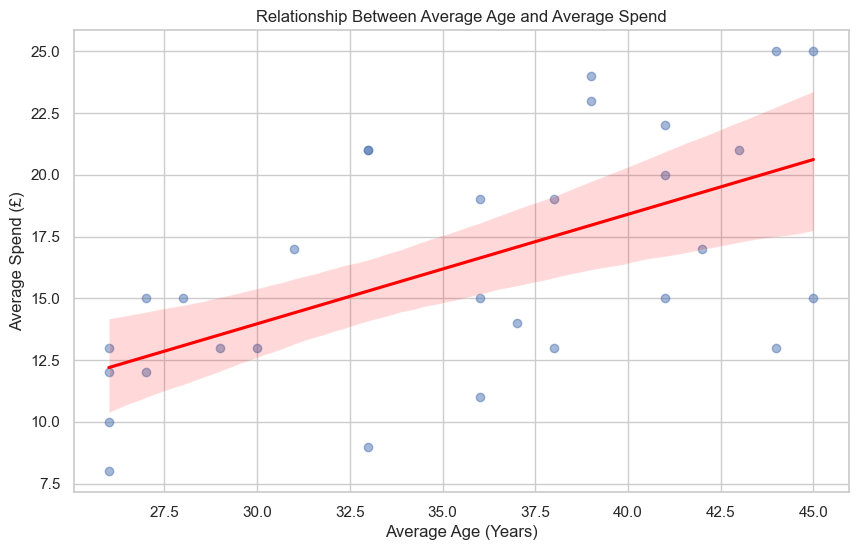

In [147]:
summary_copy = summary_df.copy()

summary_copy['Average Age (Years)'] = pd.to_numeric(summary_copy['Average Age (Years)'], errors='coerce')
summary_copy['Average Spend (£)'] = pd.to_numeric(summary_copy['Average Spend (£)'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.regplot(x='Average Age (Years)', y='Average Spend (£)', data=summary_copy, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Relationship Between Average Age and Average Spend')
plt.xlabel('Average Age (Years)')
plt.ylabel('Average Spend (£)')
plt.show()

**Average Age (Years) and Average Spend (£)**: The correlation of 0.595856 suggests a moderate positive relationship, meaning that as the average age of cinema-goers increases, their average spend tends to increase as well.

---
### Bubble Chart: Seating Capacity vs. Marketing Spend with Average Spend

This code produces a bubble chart that explores the relationship between a cinema's seating capacity and its marketing expenditure, with the bubble size representing the average spend per customer. Each bubble's position is determined by the cinema's seating capacity (x-axis) and marketing spend (y-axis), while its size reflects the average spend, providing a multi-dimensional view of the data. The color gradient, shown by the color bar, indicates the average spend values corresponding to the bubble sizes, offering a visual representation of three related aspects of the cinema data in a single plot.

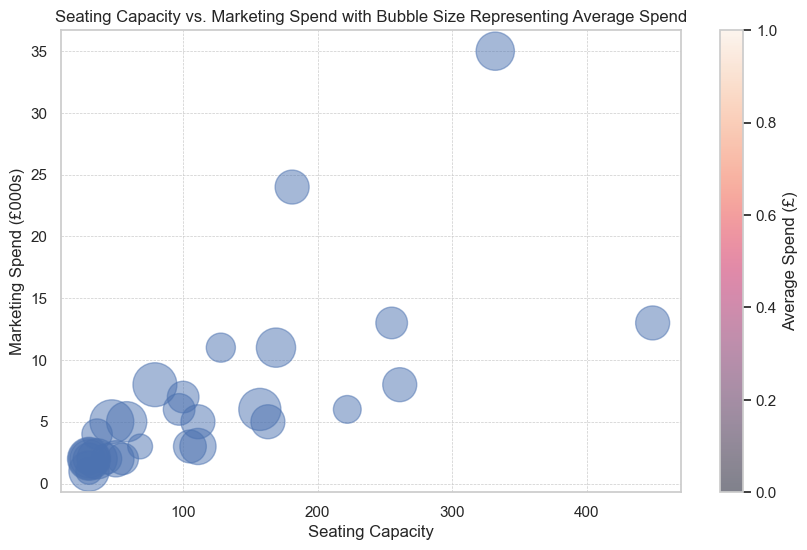

In [148]:
summary_copy = summary_df.copy()

bubble_size = summary_copy['Average Spend (£)'] / summary_copy['Average Spend (£)'].max() * 1000  # Adjust the scaling factor (1000 here) as needed

plt.figure(figsize=(10, 6))
plt.scatter(summary_copy['Seating Capacity'], summary_copy['Marketing Spend (£000s)'], s=bubble_size, alpha=0.5)
plt.xlabel('Seating Capacity')
plt.ylabel('Marketing Spend (£000s)')
plt.title('Seating Capacity vs. Marketing Spend with Bubble Size Representing Average Spend')
plt.colorbar(label='Average Spend (£)')  # Show color scale if bubble size represents another variable

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

**Seating Capacity and Marketing Spend (£000s)**: With a correlation of 0.700083, there's a strong positive relationship here, indicating that cinemas with larger seating capacities tend to spend more on marketing.

---
## 2D Density Plot: Seating Capacity vs. Marketing Spend (Experimental)

This code generates a 2D kernel density estimate plot, a sophisticated visualization technique that highlights the distribution and density of data points across two variables: seating capacity and marketing spend. Drawing inspiration from a Think Design article on data visualization, this plot leverages the 'mako' colormap to create a visual gradient of data concentration. The technique emphasizes areas with a higher aggregation of cinemas based on their seating capacities and marketing budgets, offering an intuitive understanding of common trends within the dataset. For more details on the methodology and design principles behind this type of visualization, refer to the Think Design article on density 2D plots [here](https://think.design/services/data-visualization-data-design/the-density-2d-plot/).

I have used 'The Density 2D Plot' article from Think Design to generate this plot.

*The Density 2D plot* - Think Design (2024). [https://think.design/services/data-visualization-data-design/the-density-2d-plot/](https://think.design/services/data-visualization-data-design/the-density-2d-plot/).

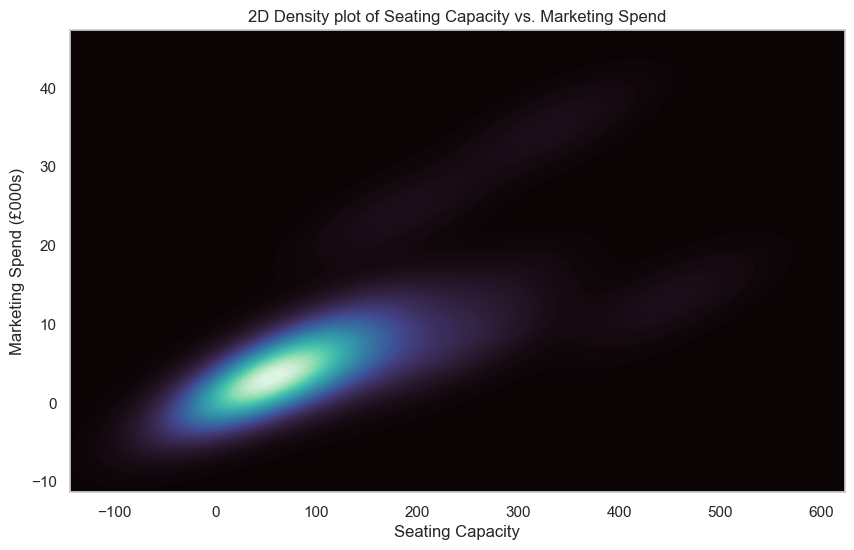

In [149]:
summary_copy = summary_df.copy()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=summary_copy, x='Seating Capacity', y='Marketing Spend (£000s)', fill=True, thresh=0, levels=100, cmap="mako")
plt.xlabel('Seating Capacity')
plt.ylabel('Marketing Spend (£000s)')
plt.title('2D Density plot of Seating Capacity vs. Marketing Spend')
plt.show()

**2D Density plot** (Experiment): With a correlation of 0.700083, there's a strong positive relationship here, indicating that cinemas with larger seating capacities tend to spend more on marketing.

---
## Correlation Matrix Heatmap

This code block creates a heatmap to visualize the correlation matrix of numerical columns in the `summary_df` DataFrame, providing a clear representation of the strength and direction of relationships between variables such as average age, seating capacity, marketing spend, overheads, and average spend. The heatmap uses a 'coolwarm' color map to differentiate between positive (red tones) and negative (blue tones) correlations, with the intensity of the color indicating the magnitude. Values are annotated within each cell for precise interpretation. This visual tool is instrumental in identifying potential areas of interest for further analysis or model development and is a staple in exploratory data analysis for uncovering underlying patterns in data.

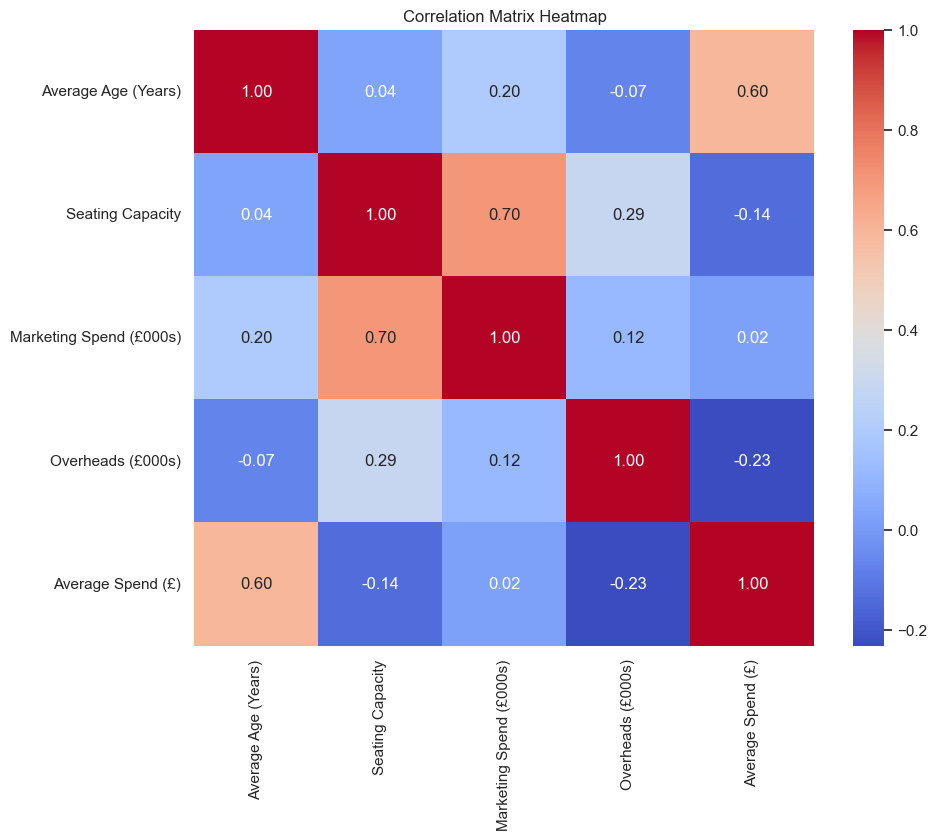

In [150]:
summary_copy = summary_df.copy()

numeric_cols_summary_df = summary_copy.select_dtypes(include=[ 'float64', 'int64' ])
correlation_matrix = numeric_cols_summary_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

The **Correlation Matrix Heatmap** is relevant because it succinctly identifies how strongly different cinema attributes relate to each other, guiding data-driven decisions. For instance, it could reveal if higher marketing spend correlates with greater customer spending, informing budget allocation strategies.

---
## Monthly Cinema Visitors Line Plot
This code snippet converts the weekly visitors' data into a monthly aggregated form and creates a line plot representing the total number of visitors to the cinema each month. By displaying data points as markers connected by lines, the plot illustrates trends and patterns over time, such as seasonal variations or the effects of promotional campaigns. This visualization is crucial for analyzing customer flow and can inform strategic decisions to enhance business performance during different periods of the year.

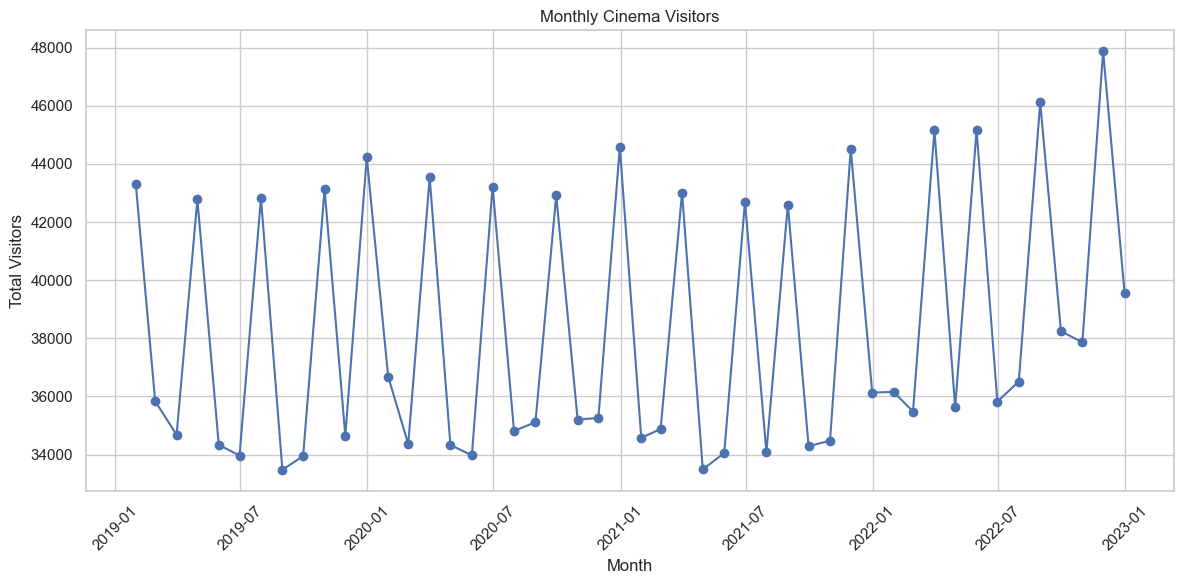

<Figure size 640x480 with 0 Axes>

In [151]:
customer_copy = customer_df.copy()

customer_copy['Date'] = pd.to_datetime(customer_copy['Date'])
monthly_visitors = customer_copy.resample('ME', on='Date').sum()

plot_name = 'Monthly Cinema Visitors'

plt.figure(figsize=(12, 6))
plt.plot(monthly_visitors.index, monthly_visitors['Weekly Visitors'], marker='o', linestyle='-')
plt.title(plot_name)
plt.xlabel('Month')
plt.ylabel('Total Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig(f'../Plots/{plot_name}.png')

**Monthly Cinema Visitors Trend**: The provided code aggregates weekly cinema visitor data into a monthly format, showcasing the fluctuations over time with a line plot. It's essential for understanding seasonal trends or the impact of specific events on cinema attendance.

---
## Time Series Decomposition of Weekly Cinema Visitors
This code performs a time series decomposition on the weekly cinema visitor data to separate it into trend, seasonal, and residual components. Using the `seasonal_decompose` method, the weekly visitor counts are broken down to highlight the underlying trend, cyclical behavior attributed to seasonality, and irregular variations not explained by the trend or seasonality (residuals). The resulting stacked plot is an excellent tool for understanding different influences on the time series data and can be used for making informed decisions in planning and forecasting.

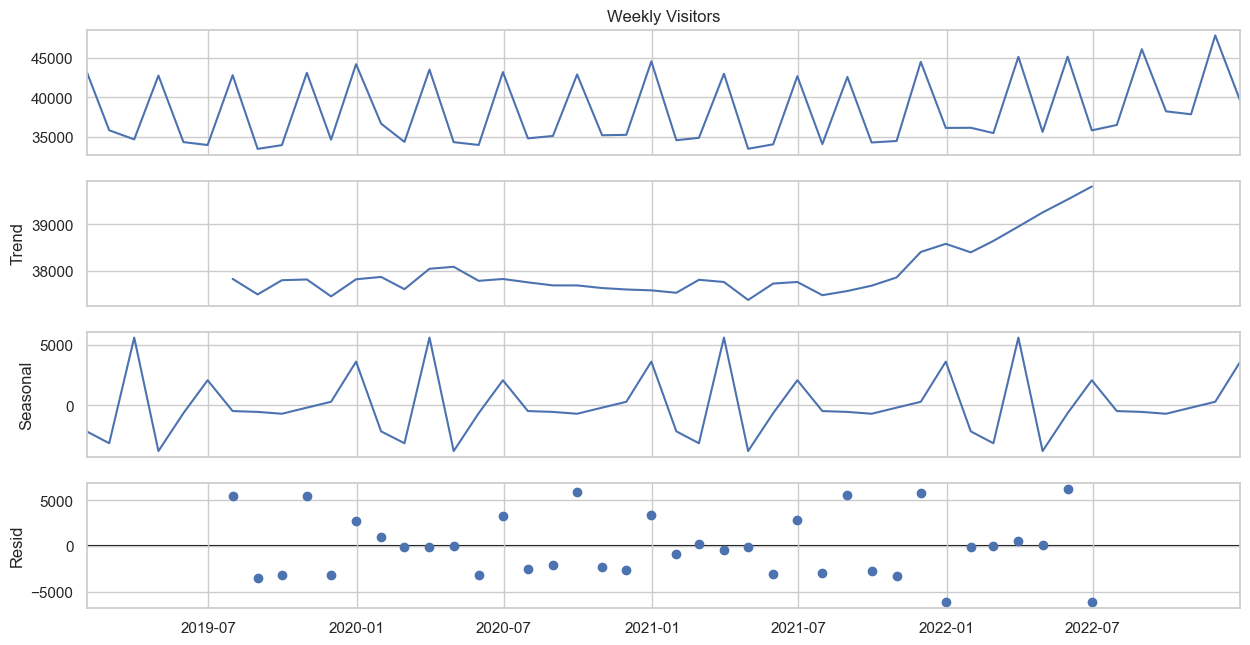

In [152]:
customer_copy = customer_df.copy()

customer_copy['Date'] = pd.to_datetime(customer_copy['Date'])
monthly_visitors = customer_copy.resample('ME', on='Date').sum()
decomposition = seasonal_decompose(monthly_visitors['Weekly Visitors'], model='additive')

fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

The **decomposition plot** is vital for recognizing patterns and anomalies in cinema visitor trends, helping managers make data-driven decisions regarding staffing, marketing, and resource allocation throughout the year.

---
## Outlier Detection in Marketing Spend
This code snippet is designed to detect outliers in the marketing spend of various cinemas. It first calculates the interquartile range (IQR) for the marketing spend, then identifies outliers as those points that fall below or above 1.5 times the IQR from the first and third quartiles, respectively. The plot created with `hvplot.scatter` provides a visual representation, marking each cinema's seating capacity against its marketing spend, and potentially highlighting the outliers for further investigation.

**Relevance:**
Identifying outliers in marketing spend is essential for uncovering data entry errors, unusual expenditures, or opportunities for budget optimization. The plot aids decision-makers in scrutinizing marketing efficiency and resource allocation across different cinema capacities.

In [153]:
summary_copy = summary_df.copy()

Q1 = summary_copy['Marketing Spend (£000s)'].quantile(0.25)
Q3 = summary_copy['Marketing Spend (£000s)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = summary_copy[(summary_copy['Marketing Spend (£000s)'] < lower_bound) | 
                        (summary_copy['Marketing Spend (£000s)'] > upper_bound)]

display(outliers)

summary_copy.hvplot.scatter(x='Seating Capacity', y='Marketing Spend (£000s)', hover_cols=['Cinema ID'])

,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£),Start Date,End Date,Status
3,WVA,45,181,24,58,15,2019-01-01,2022-12-27,Running
13,YBS,36,332,35,56,19,2019-01-01,2022-12-27,Running


:Scatter   [Seating Capacity]   (Marketing Spend (£000s),Cinema ID)

**Outliers Identification**: The box plot for 'Marketing Spend (£000s)' shows at least one cinema (possibly the one with Cinema ID 'YBS') that appears to be an outlier with a significantly higher marketing spend than others. Points outside this range are considered outliers and are marked individually.

**Scatter Plot Observations**: The scatter plot of 'Marketing Spend (£000s)' versus 'Seating Capacity' provides a visual indication of the relationship between these two variables. Most data points seem to cluster towards the lower end of both axes, suggesting that many cinemas have smaller capacities and spend less on marketing. The cinema with ID 'YBS' stands out with a high seating capacity and the highest marketing spend, which corroborates its identification as an outlier in the box plot.

---

### Z-Score Based Outlier Detection in Marketing Spend
This code calculates the Z-scores of the marketing spend for various cinemas, which standardizes the data by subtracting the mean and dividing by the standard deviation. It then identifies outliers as those data points where the absolute Z-score is greater than 3, which are considered statistically significant deviations from the mean. This method is a common approach for outlier detection in data science.

**Relevance:**
The use of Z-scores for outlier detection helps in identifying cinemas that have an exceptionally high or low marketing spend, which could indicate extraordinary success, potential issues, or errors in the data. This insight is valuable for auditing and strategic planning purposes.

In [154]:
z_scores = stats.zscore(summary_copy['Marketing Spend (£000s)'])

outliers_z = summary_copy[(np.abs(z_scores) > 3)]

display(outliers_z)

,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£),Start Date,End Date,Status
13,YBS,36,332,35,56,19,2019-01-01,2022-12-27,Running


**Summary Table Insights**: The rows in the summary table likely represent the outliers identified in the visualizations. For instance, the cinema with ID 'WVA' might be on the higher end but not extreme enough to be considered an outlier. In contrast, 'YBS' shows values that are significantly higher for both 'Seating Capacity' and 'Marketing Spend (£000s)', indicating it's an outlier.

---
### Boxplot and Scatterplot Comparison of Marketing Spend
The code generates two side-by-side plots—a boxplot illustrating the distribution of marketing spend and a scatterplot comparing seating capacity to marketing spend, with cinema IDs indicated by color and style. The boxplot displays the median, quartiles, and outliers of the marketing spend, while the scatterplot provides a visual correlation between the seating capacity of a cinema and the amount spent on marketing, differentiated by unique cinema IDs.

**Relevance:**
These visualizations offer a clear summary of spending behavior, with the boxplot identifying the typical and exceptional spend amounts, and the scatterplot revealing potential patterns or correlations between the size of a cinema and its marketing investment. This is crucial for identifying spending trends and making informed budgetary decisions.

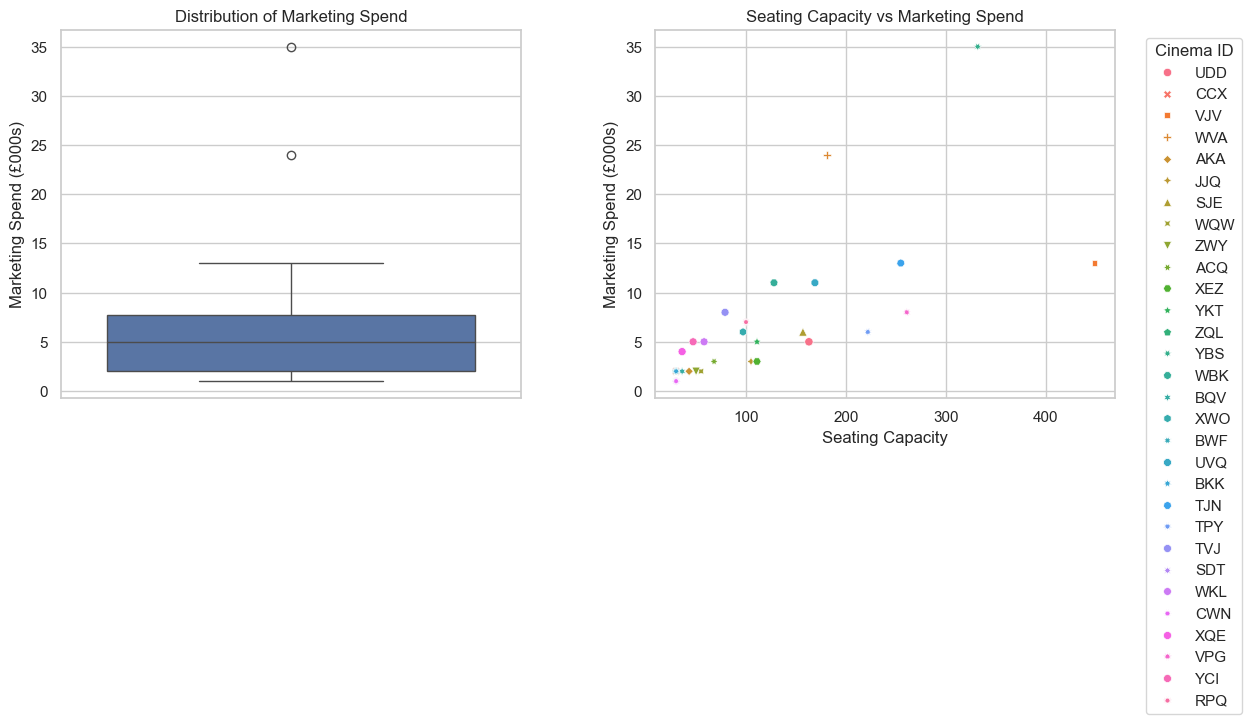

In [155]:
sns.set_style('whitegrid')

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data=summary_df, y='Marketing Spend (£000s)')
plt.title('Distribution of Marketing Spend')

plt.subplot(1, 2, 2)
sns.scatterplot(data=summary_df, x='Seating Capacity', y='Marketing Spend (£000s)', hue='Cinema ID', style='Cinema ID')
plt.title('Seating Capacity vs Marketing Spend')
plt.legend(title='Cinema ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot

plt.tight_layout(pad=5)

plt.show()

---
## Seating Capacity vs Marketing Spend per Cinema

This code block generates a scatter plot displaying the relationship between the seating capacity of cinemas and their marketing spend. Each point on the graph represents a cinema, differentiated by ID and the average spend (£) as the size of the marker, providing a clear visual differentiation of spend relative to capacity.

**Relevance:**
The plot is relevant as it can provide insights into the marketing strategies of different cinemas based on their size. The visualization highlights if larger cinemas are spending proportionally more on marketing and if this spend is correlated with a higher average customer spend. This can inform budget allocation and marketing efforts for cinema chains or independent cinemas.

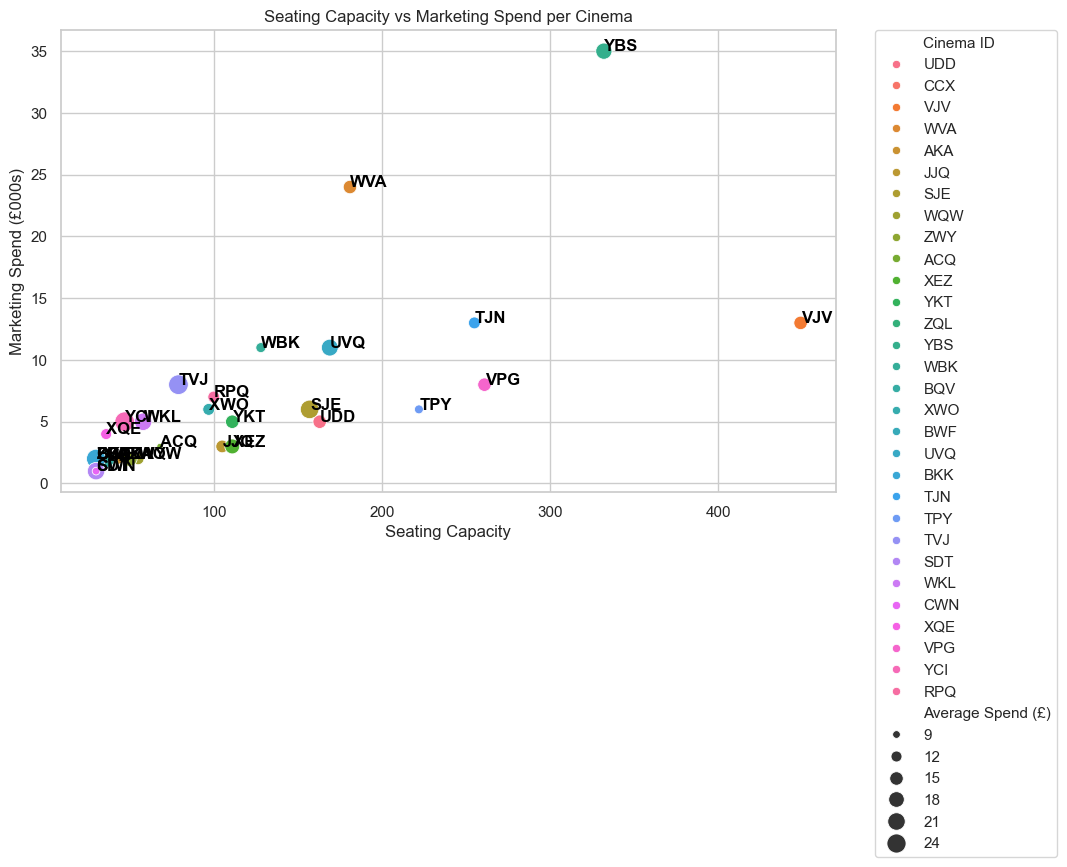

In [156]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=summary_df, x='Seating Capacity', y='Marketing Spend (£000s)', size='Average Spend (£)', hue='Cinema ID', sizes=(20, 200))

for line in range(0, summary_df.shape[0]):
     scatter.text(summary_df['Seating Capacity'][line]+0.2, summary_df['Marketing Spend (£000s)'][line], summary_df['Cinema ID'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Seating Capacity vs Marketing Spend per Cinema')
plt.xlabel('Seating Capacity')
plt.ylabel('Marketing Spend (£000s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

---
## Number of Cinemas by Visitor Volume Category

The provided code generates a bar chart that categorizes cinemas into low, medium, and high visitor volume categories based on their total weekly visitors. It utilizes visitor count quantiles to determine the thresholds for each category and applies a custom function to assign each cinema to the appropriate category. Finally, it visualizes the number of cinemas in each volume category.

**Relevance:**
The chart is significant for analyzing the distribution of cinemas based on visitor volume. It allows stakeholders to quickly identify how many cinemas fall into each category, which can be crucial for strategic decisions such as targeted marketing, resource allocation, and performance benchmarking against other cinemas within the same volume category.

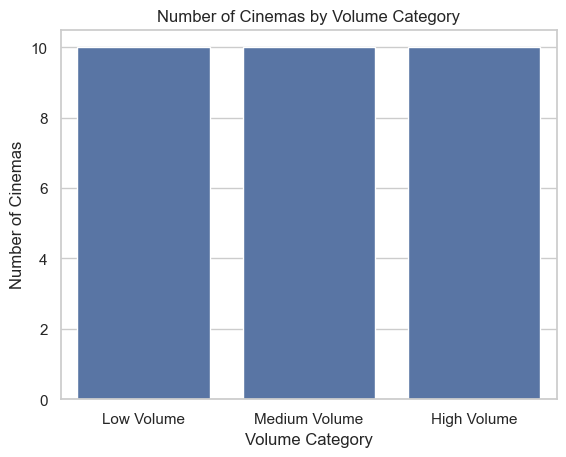

In [157]:
customer_copy = customer_df.copy()

total_volume = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()
volume_quantiles = total_volume['Weekly Visitors'].quantile([0.33, 0.66])

def volume_category(visitor_count):
    if visitor_count <= volume_quantiles.iloc[0]:
        return 'Low Volume'
    elif visitor_count <= volume_quantiles.iloc[1]:
        return 'Medium Volume'
    else:
        return 'High Volume'

total_volume['Volume Category'] = total_volume['Weekly Visitors'].apply(volume_category)

sns.countplot(data=total_volume, x='Volume Category', order=['Low Volume', 'Medium Volume', 'High Volume'])
plt.title('Number of Cinemas by Volume Category')
plt.xlabel('Volume Category')
plt.ylabel('Number of Cinemas')
plt.show()

---
## Average Marketing Spend by Cinema Visitor Volume Category

The code block performs data preparation to assign each cinema to a visitor volume category—'Low Volume', 'Medium Volume', or 'High Volume'—based on their total weekly visitors. The categorization is done by computing visitor count quantiles. Then, it calculates the average marketing spend for cinemas in each volume category and produces a bar chart that illustrates these averages.

**Relevance:**
This visualization is useful for understanding the marketing investment strategies among different categories of cinemas based on their traffic volume. The insight that higher-volume cinemas spend more on marketing on average could influence budget allocation decisions and highlight the potential correlation between marketing spend and visitor volume.

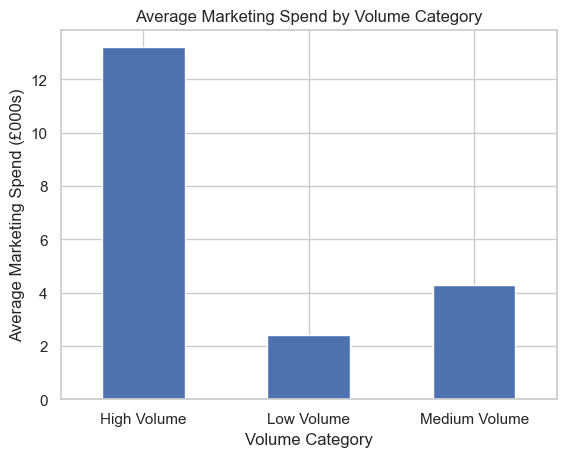

In [158]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

total_volume = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

def volume_category(visitor_count):
    if visitor_count <= volume_quantiles.iloc[0]:
        return 'Low Volume'
    elif visitor_count <= volume_quantiles.iloc[1]:
        return 'Medium Volume'
    else:
        return 'High Volume'

total_volume['Volume Category'] = total_volume['Weekly Visitors'].apply(volume_category)
volume_quantiles = total_volume['Weekly Visitors'].quantile([0.33, 0.66])
summary_df_with_volume = pd.merge(summary_copy, total_volume[['Cinema ID', 'Volume Category']], on='Cinema ID', how='left')
avg_marketing_by_volume = summary_df_with_volume.groupby('Volume Category')['Marketing Spend (£000s)'].mean()

avg_marketing_by_volume.plot(kind='bar')
plt.title('Average Marketing Spend by Volume Category')
plt.xlabel('Volume Category')
plt.ylabel('Average Marketing Spend (£000s)')
plt.xticks(rotation=0)
plt.show()

---
## Distribution of Cinema Visits Analysis

The provided code aggregates the total weekly visitors for each cinema and visualizes this information using a histogram with a kernel density estimate (KDE) overlay. The histogram displays the frequency distribution of total cinema visits, offering a view of how these visits are spread across different cinemas.

**Relevance:**
This chart is pertinent for identifying trends and outliers in cinema visitation. For instance, it could help in recognizing whether most cinemas have a similar range of visits or if there are a few with exceptionally high or low numbers, which could signify opportunities for targeted marketing strategies or operational improvements.

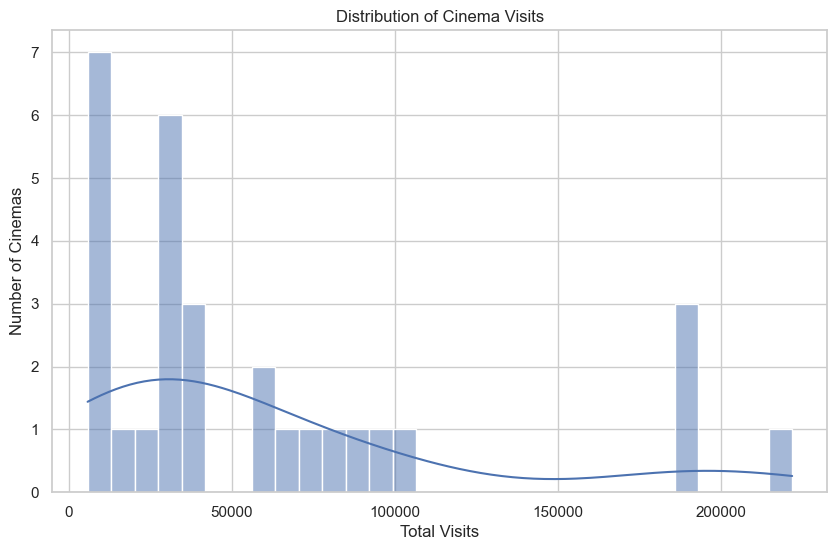

In [159]:
customer_copy = customer_df.copy()

cinema_visits = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(cinema_visits['Weekly Visitors'], bins=30, kde=True)
plt.title('Distribution of Cinema Visits')
plt.xlabel('Total Visits')
plt.ylabel('Number of Cinemas')
plt.show()

---
## Scatter Plot of Financial Metrics for High Volume Cinemas

The script merges cinema visitation data with financial metrics, segregates high volume cinemas based on visitor quantiles, and visualizes their financial data using a pair plot. This matrix of scatterplots shows the pairwise relationships between marketing spend, overheads, average spend per visitor, and total weekly visitors for high volume cinemas.

**Relevance:**
This visualization aids in uncovering correlations and patterns between different financial aspects of high-performing cinemas. It’s a valuable tool for highlighting potential areas of efficiency and for uncovering the influence of marketing and overheads on revenue and customer turnout. The insights derived could be instrumental for strategic planning and optimization in the cinema business sector.

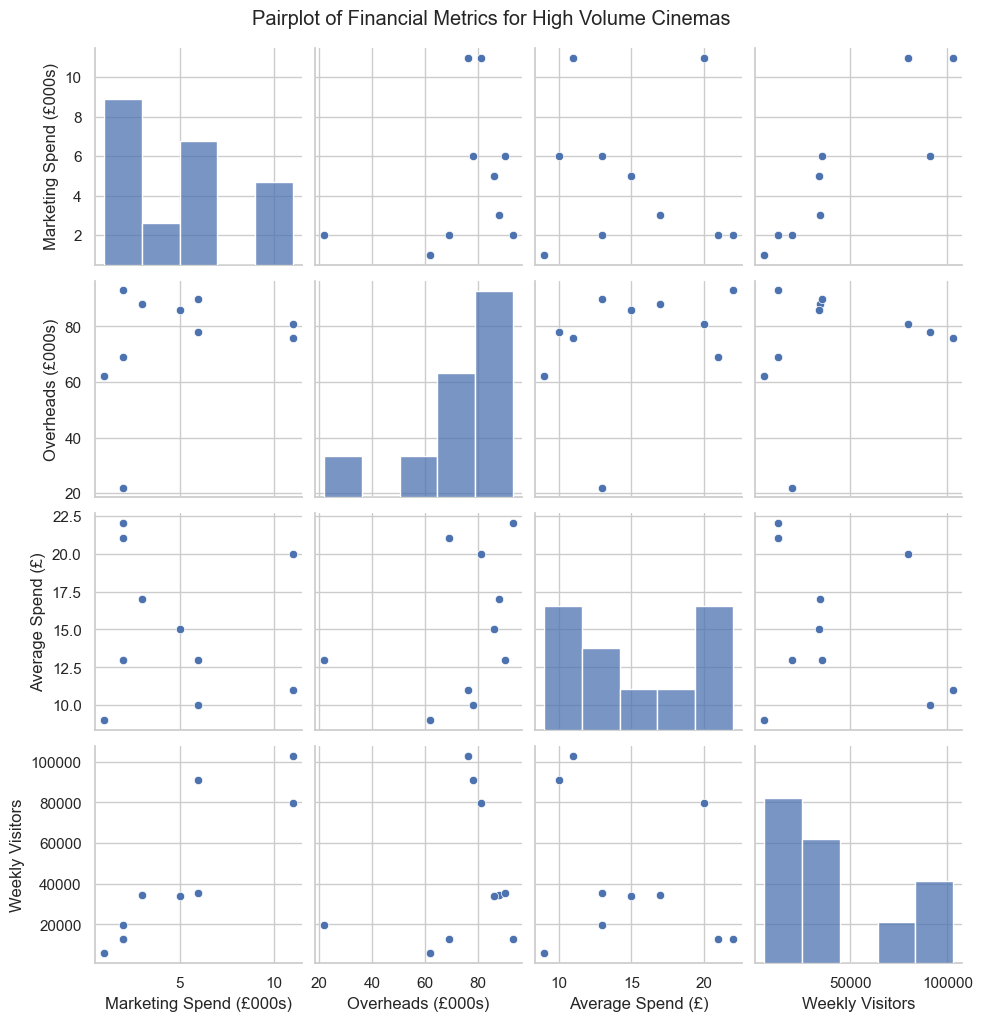

In [160]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

cinema_visits = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

quantiles = cinema_visits['Weekly Visitors'].quantile([0.33, 0.66])
low_threshold, high_threshold = quantiles[0.33], quantiles[0.66]

high_volume = cinema_visits[cinema_visits['Weekly Visitors'] > high_threshold]
medium_volume = cinema_visits[(cinema_visits['Weekly Visitors'] > low_threshold) & (cinema_visits['Weekly Visitors'] <= high_threshold)]
low_volume = cinema_visits[cinema_visits['Weekly Visitors'] <= low_threshold]

total_volume = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

def volume_category(visitor_count):
    if visitor_count <= volume_quantiles.iloc[0]:
        return 'Low Volume'
    elif visitor_count <= volume_quantiles.iloc[1]:
        return 'Medium Volume'
    else:
        return 'High Volume'

total_volume['Volume Category'] = total_volume['Weekly Visitors'].apply(volume_category)

summary_copy['Volume Category'] = pd.cut(
    cinema_visits['Weekly Visitors'], 
    bins=[-np.inf, low_threshold, high_threshold, np.inf], 
    labels=['Low', 'Medium', 'High']
)

summary_copy = summary_copy.merge(
    cinema_visits[['Cinema ID', 'Weekly Visitors']], 
    on='Cinema ID', 
    how='left'
)

high_volume_df = summary_copy[summary_copy['Volume Category'] == 'High']

sns.pairplot(high_volume_df[['Marketing Spend (£000s)', 'Overheads (£000s)', 'Average Spend (£)', 'Weekly Visitors']])
plt.suptitle('Pairplot of Financial Metrics for High Volume Cinemas', y=1.02)
plt.show()

**Pairplot for High Volume Cinemas**: This plot gives us an idea of the relationships between different financial metrics. For instance, if there is a positive correlation between marketing spend and weekly visitors, it might suggest that increased marketing efforts contribute to higher footfall. Similarly, we can observe how overheads relate to marketing spend and whether a higher average spend per visitor correlates with higher total visitors. There might be outliers or clusters that are worth investigating further.

---
## Marketing Spend vs. Average Spend for Medium Volume Cinemas

This Python script performs a data merge operation between two dataframes to include the total visitor data for each cinema. After classifying cinemas into 'Low', 'Medium', and 'High' volume categories based on visitor quantiles, it focuses on the 'Medium' category. A scatter plot is then generated that examines the relationship between marketing expenditure and the average spend per visitor for these medium volume cinemas. Point size and color vary with the cinema's seating capacity and total visitors, providing a layered perspective on spending behaviors relative to marketing efforts and cinema characteristics.

**Relevance:**
The plot is particularly useful for assessing the cost-effectiveness of marketing expenditures across cinemas of different sizes and visitor volumes. It highlights how average customer spend scales with marketing spend, which is crucial for budget allocation and marketing strategy optimization in the cinema industry.


First few rows of summary_copy after merging:


,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£),Start Date,End Date,Status,Total Visitors
0,UDD,27,163,5,65,15,2019-01-01,2022-12-27,Running,73168
1,CCX,38,30,2,18,19,2021-01-05,2022-12-27,Running,11936
2,VJV,41,449,13,87,15,2019-01-01,2022-12-27,Running,191476
3,WVA,45,181,24,58,15,2019-01-01,2022-12-27,Running,191783
4,AKA,26,43,2,13,12,2020-01-07,2022-12-20,Closed,12758



'Total Visitors' column successfully added.


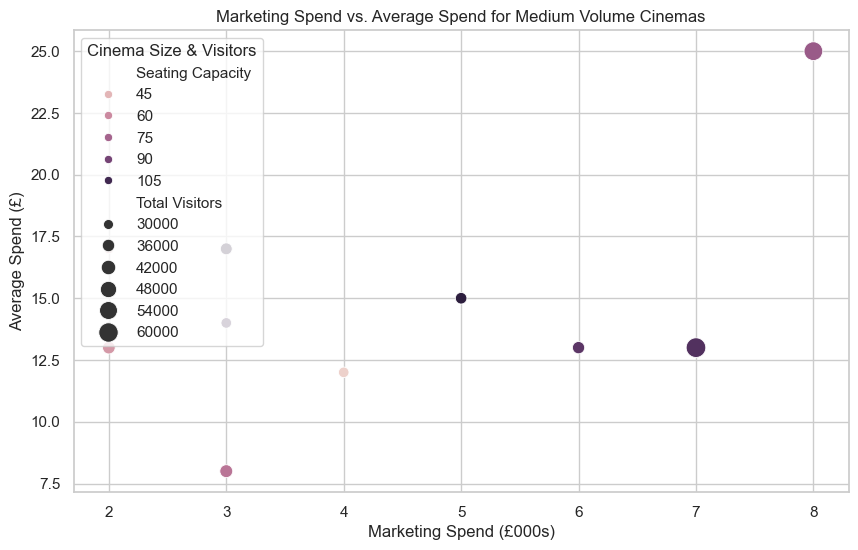

In [161]:
customer_copy = customer_df.copy()
summary_copy = summary_df.copy()

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()
total_visitors_per_cinema.rename(columns={'Weekly Visitors': 'Total Visitors'}, inplace=True)

summary_copy = summary_copy.merge(total_visitors_per_cinema, on='Cinema ID', how='left')

print("\nFirst few rows of summary_copy after merging:")
display(summary_copy.head())

if 'Total Visitors' in summary_copy.columns:
    print("\n'Total Visitors' column successfully added.")

    quantiles = summary_copy['Total Visitors'].quantile([0.33, 0.66]).values
    summary_copy['Volume Category'] = pd.cut(
        summary_copy['Total Visitors'], 
        bins=[-np.inf, quantiles[0], quantiles[1], np.inf], 
        labels=['Low', 'Medium', 'High']
    )

    medium_volume_df = summary_copy[summary_copy['Volume Category'] == 'Medium']

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='Marketing Spend (£000s)', 
        y='Average Spend (£)', 
        hue='Seating Capacity', 
        size='Total Visitors', 
        sizes=(50, 200), 
        data=medium_volume_df
    )
    plt.title('Marketing Spend vs. Average Spend for Medium Volume Cinemas')
    plt.xlabel('Marketing Spend (£000s)')
    plt.ylabel('Average Spend (£)')
    plt.legend(title='Cinema Size & Visitors', loc='upper left')
    plt.show()
else:
    print("\nError: 'Total Visitors' column not added. Please check the merge operation.")

**Marketing Spend vs. Average Spend for Medium Volume Cinemas**: This scatter plot aims to reveal if there's a relationship between the marketing spend and the average spend per visitor. The size of the markers indicates seating capacity, while their color and size also represent the weekly visitors. This plot could suggest how effective marketing spend is in influencing visitor spending and if seating capacity is related to either metric.

---
## Marketing Spend Impact on Medium Volume Cinemas
The code generates a scatter plot showing the relationship between marketing spend and average spend for medium volume cinemas. The size and color of each point reflect the cinema's seating capacity and total visitor numbers, respectively. This visualization aims to understand how marketing investments influence customer spending and correlate with cinema size and visitor traffic.

**Relevance:**
This plot is key for decision-makers to evaluate the effectiveness of marketing strategies. By observing the spread of points, it can be inferred whether higher marketing spend correlates with increased average spending per visitor, and how this trend is influenced by the cinema's seating capacity and popularity.

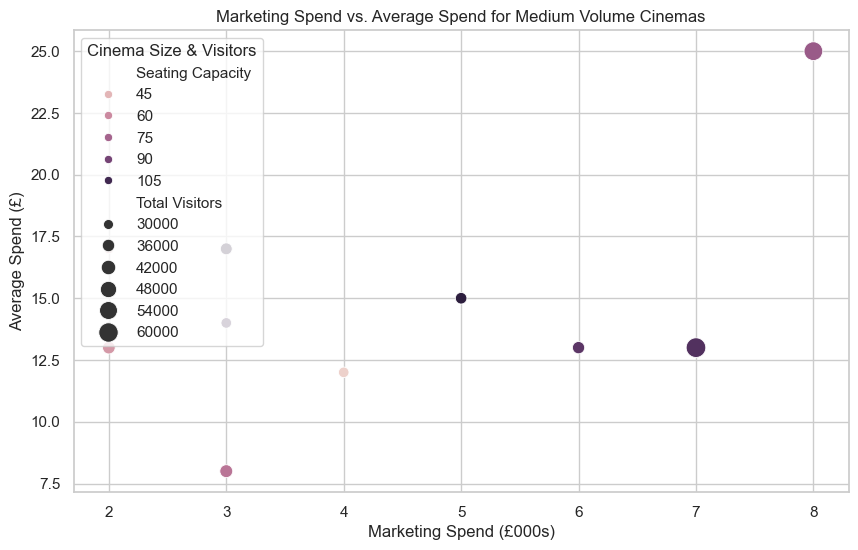

In [162]:
customer_copy = customer_df.copy()
summary_copy = summary_df.copy()

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()
total_visitors_per_cinema.rename(columns={'Weekly Visitors': 'Total Visitors'}, inplace=True)

summary_copy = summary_copy.merge(total_visitors_per_cinema, on='Cinema ID', how='left')

quantiles = summary_copy['Total Visitors'].quantile([0.33, 0.66]).values
summary_copy['Volume Category'] = pd.cut(summary_copy['Total Visitors'], 
                                       bins=[-np.inf, quantiles[0], quantiles[1], np.inf], 
                                       labels=['Low', 'Medium', 'High'])

medium_volume_df = summary_copy[summary_copy['Volume Category'] == 'Medium']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Marketing Spend (£000s)', 
    y='Average Spend (£)', 
    hue='Seating Capacity', 
    size='Total Visitors',
    sizes=(50, 200), 
    data=medium_volume_df
)
plt.title('Marketing Spend vs. Average Spend for Medium Volume Cinemas')
plt.xlabel('Marketing Spend (£000s)')
plt.ylabel('Average Spend (£)')
plt.legend(title='Cinema Size & Visitors', loc='upper left')
plt.show()

**Seating Capacity vs. Average Spend for Low Volume Cinemas**: This visualization displays seating capacity against average spend per visitor for low volume cinemas, with the size of the markers representing the number of weekly visitors. A relationship between seating capacity and average spend could indicate that larger cinemas might not be capitalizing on their potential to generate higher revenue per visitor, or that despite having a high seating capacity, the visitor numbers are low.

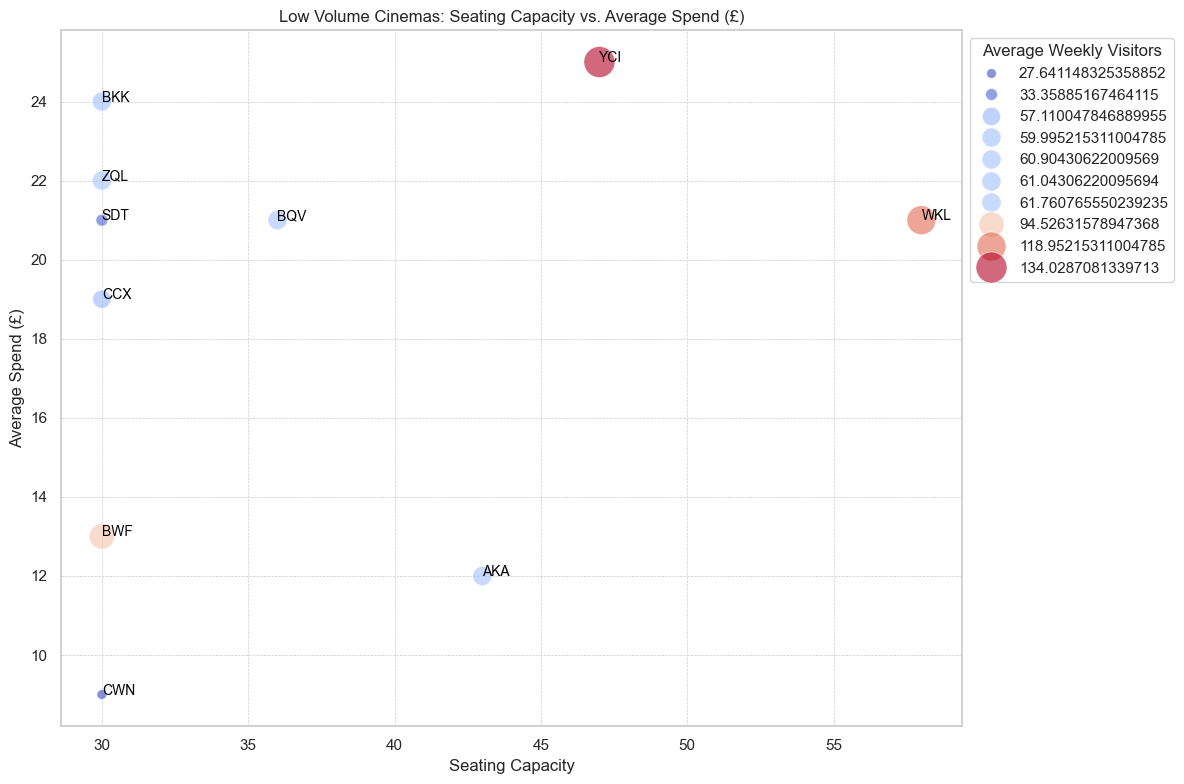

In [163]:
customer_copy = customer_df.copy()
summary_copy = summary_df.copy()

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index().rename(columns={'Weekly Visitors': 'Total Visitors'})
average_weekly_visitors = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index().rename(columns={'Weekly Visitors': 'Average Weekly Visitors'})

summary_copy = summary_copy.merge(total_visitors_per_cinema, on='Cinema ID', how='left')
summary_copy = summary_copy.merge(average_weekly_visitors, on='Cinema ID', how='left')

quantiles = summary_copy['Total Visitors'].quantile([0.33, 0.66])
summary_copy['Volume Category'] = pd.cut(summary_copy['Total Visitors'], bins=[-np.inf, quantiles[0.33], quantiles[0.66], np.inf], labels=['Low', 'Medium', 'High'])

low_volume_df = summary_copy[summary_copy['Volume Category'] == 'Low']

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(data=low_volume_df, 
                          x='Seating Capacity', 
                          y='Average Spend (£)', 
                          size='Average Weekly Visitors', 
                          hue='Average Weekly Visitors',
                          palette='coolwarm',
                          sizes=(50, 500),
                          alpha=0.6,
                          legend='full')

for i in range(len(low_volume_df)):
    plt.text(x=low_volume_df['Seating Capacity'].iloc[i],
             y=low_volume_df['Average Spend (£)'].iloc[i],
             s=low_volume_df['Cinema ID'].iloc[i],
             fontdict=dict(color='black', size=10))

scatter.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Average Weekly Visitors')
plt.title('Low Volume Cinemas: Seating Capacity vs. Average Spend (£)')
plt.xlabel('Seating Capacity')
plt.ylabel('Average Spend (£)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

**Weekly Visitors Trend**: This plot exhibits fluctuations that are common on a week-by-week basis. The variability could be due to various factors including movie releases, holidays, and other events that influence cinema attendance.

**Monthly Average Visitors Trend**: The monthly plot smoothens out the weekly variations and shows a clearer trend. It appears there's an overall upward trend in the monthly average number of visitors. However, there are periods where the number dips, which may correspond to seasonal changes or other factors.

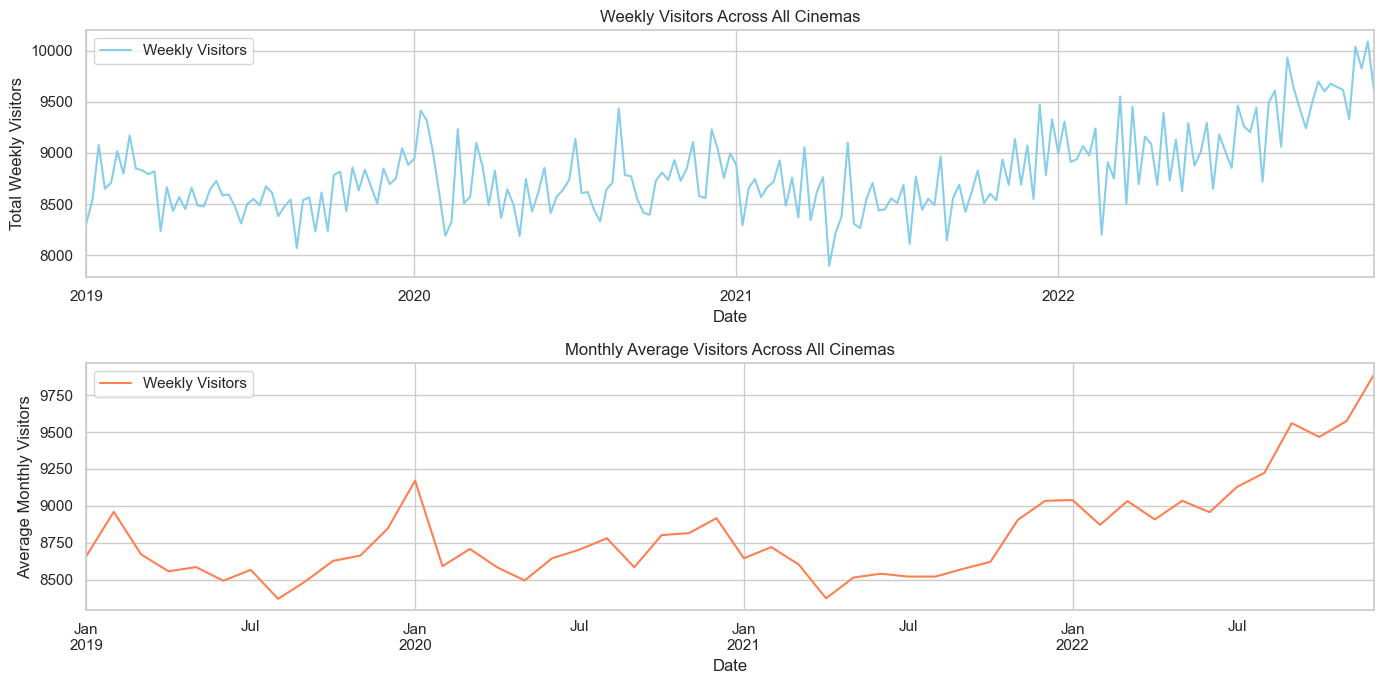

In [164]:
customer_copy = customer_df.copy()

customer_copy['Date'] = pd.to_datetime(customer_copy['Date'])
customer_copy.index = customer_copy.set_index('Date')

total_visitors_weekly = customer_copy.groupby('Date')['Weekly Visitors'].sum()
total_visitors_monthly = total_visitors_weekly.resample('ME').mean()

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
total_visitors_weekly.plot(title='Weekly Visitors Across All Cinemas', color='skyblue')
plt.ylabel('Total Weekly Visitors')
plt.legend()

plt.subplot(2, 1, 2)
total_visitors_monthly.plot(title='Monthly Average Visitors Across All Cinemas', color='coral')
plt.ylabel('Average Monthly Visitors')

plt.tight_layout()
plt.legend()
plt.show()

---
## Seating Capacity Influence on Visitor Traffic
This code block creates a bubble scatter plot to visualize how the seating capacity of cinemas correlates with the average number of weekly visitors. Each bubble represents a cinema, with its size proportional to the average weekly visitors, showing the potential impact of capacity on visitor numbers.

**Relevance:**
The plot emphasizes the importance of seating capacity as a factor in attracting visitors. Larger bubbles indicate a higher visitor turnout, which could suggest that cinemas with more seating have the potential to attract more visitors, a crucial insight for business expansion and capacity planning strategies.

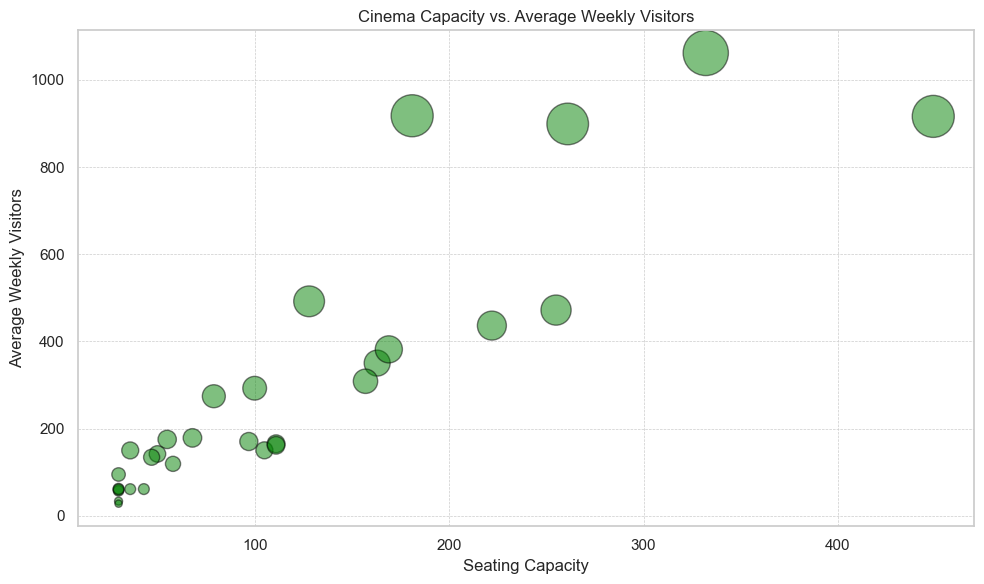

In [165]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

average_weekly_visitors_copy = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

merged_df = pd.merge(summary_copy[['Cinema ID', 'Seating Capacity']], average_weekly_visitors_copy, on='Cinema ID', how='inner')

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Seating Capacity'], merged_df['Weekly Visitors'], 
            s=merged_df['Weekly Visitors'], # Bubble size determined by average weekly visitors
            alpha=0.5, color='green', edgecolor='black', linewidth=1)

plt.title('Cinema Capacity vs. Average Weekly Visitors')
plt.xlabel('Seating Capacity')
plt.ylabel('Average Weekly Visitors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

---
## Cinema Age Impact on Visitor Volume
The code generates a scatter plot that examines the relationship between the age of cinemas and their average weekly visitor volume. Each point represents a cinema, plotted according to its age and the number of visitors it draws on average each week.

**Relevance:**
This visualization aids in understanding how the age of a cinema might correlate with its popularity or visitor retention. It can be crucial for strategic decisions regarding renovations, marketing to different age demographics, or considering when it might be beneficial to open new venues.

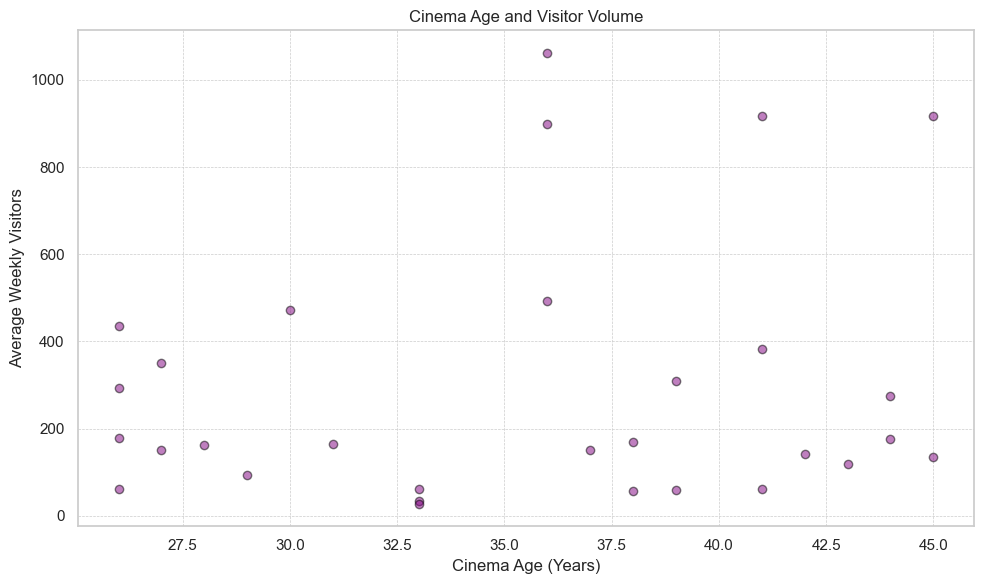

In [166]:
summary_copy = summary_df[['Cinema ID', 'Average Age (Years)']].copy()
customer_copy = customer_df.copy()

average_weekly_visitors_copy = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

merged_df = pd.merge(summary_copy, average_weekly_visitors_copy, on='Cinema ID', how='inner')

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Average Age (Years)'], merged_df['Weekly Visitors'], 
            color='purple', alpha=0.5, edgecolor='black', linewidth=1)

plt.title('Cinema Age and Visitor Volume')
plt.xlabel('Cinema Age (Years)')
plt.ylabel('Average Weekly Visitors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

---
## Scatterplot with Trend Line: Marketing Spend vs. Visitor Volume
This code produces a scatterplot that plots the marketing spend against the average weekly visitors per cinema. It calculates the line of best fit and the correlation coefficient to quantify the strength of the relationship. Points are color-coded in red for visibility, and the line of best fit is in blue, with its correlation value labeled.

**Relevance:**
This plot is significant as it clearly shows the correlation between marketing spend and visitor volume, offering insights into the return on investment of marketing efforts. The correlation coefficient in the trend line label provides an immediate understanding of the strength and direction of this relationship, which can inform budget allocation strategies.

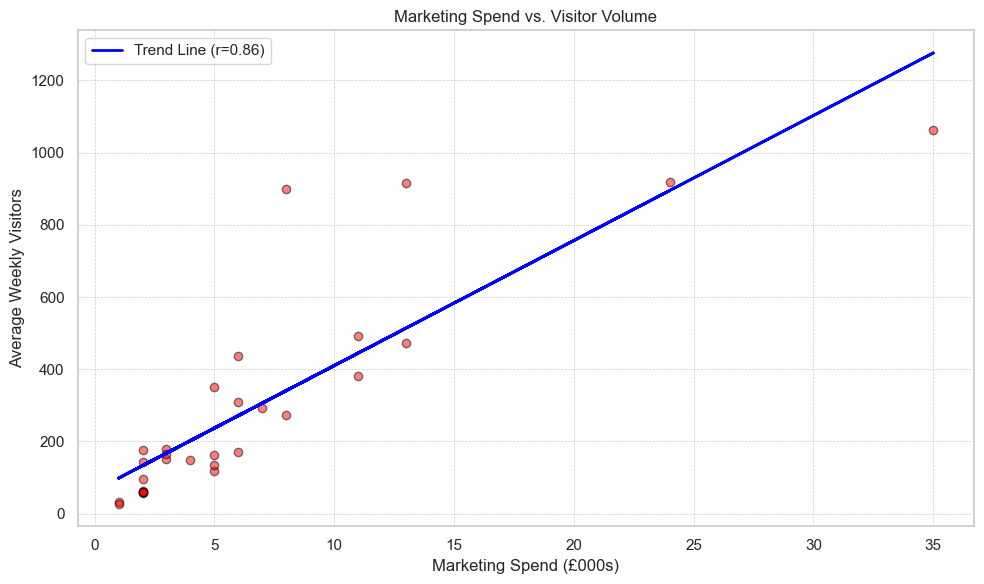

In [167]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

average_weekly_visitors_copy = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

merged_df = pd.merge(summary_copy[['Cinema ID', 'Marketing Spend (£000s)']], 
                     average_weekly_visitors_copy, 
                     on='Cinema ID', 
                     how='inner')

slope, intercept, r_value, p_value, std_err = linregress(merged_df['Marketing Spend (£000s)'], merged_df['Weekly Visitors'])
line = slope * merged_df['Marketing Spend (£000s)'] + intercept

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Marketing Spend (£000s)'], merged_df['Weekly Visitors'], 
            color='red', alpha=0.5, edgecolor='black', linewidth=1)
plt.plot(merged_df['Marketing Spend (£000s)'], line, color='blue', linewidth=2, 
         label=f'Trend Line (r={r_value:.2f})')

plt.title('Marketing Spend vs. Visitor Volume')
plt.xlabel('Marketing Spend (£000s)')
plt.ylabel('Average Weekly Visitors')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Horizontal Bar Chart: Cinema Overheads vs. Visitor Volume
The code generates a horizontal bar chart that compares the overhead costs of each cinema, sorted in ascending order. The visual representation uses varying bar lengths to indicate the amount of overhead in thousands of pounds, providing an intuitive grasp of each cinema's operational costs.

**Relevance:**
This chart is relevant for visualizing and comparing the overhead expenses of different cinemas, offering a clear and straightforward comparison. By displaying operational costs alongside cinema IDs, stakeholders can quickly identify which cinemas have higher overheads, which is critical for cost management and optimization strategies.

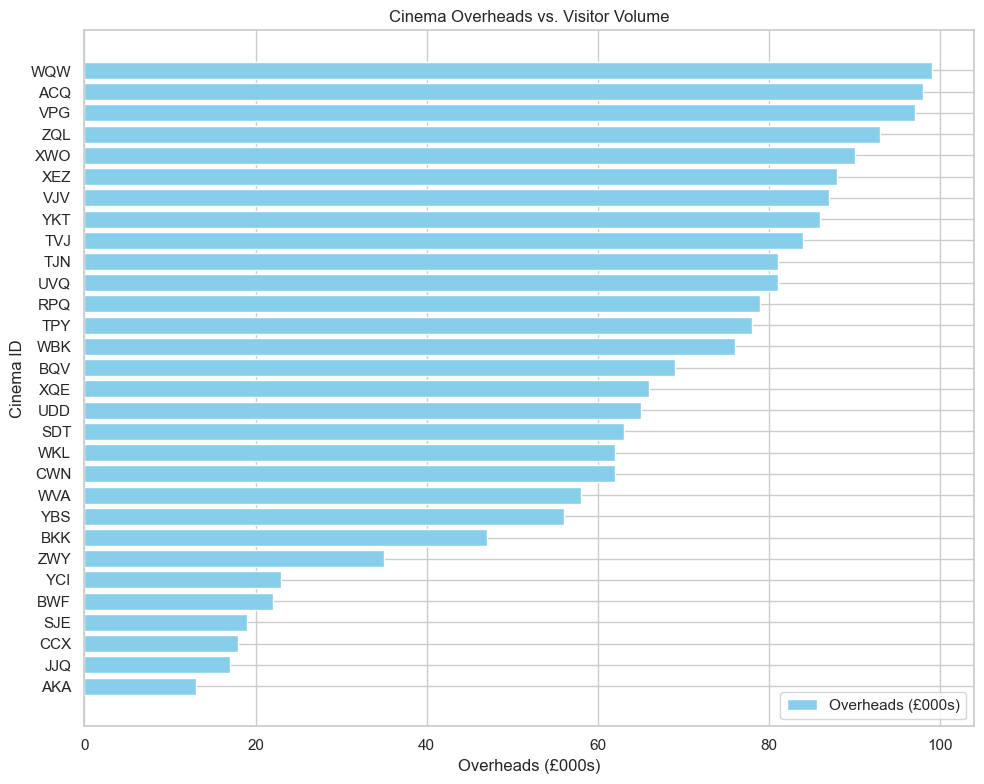

In [168]:
summary_copy = summary_df[['Cinema ID', 'Overheads (£000s)']].copy()
customer_copy = customer_df.copy()

average_weekly_visitors_copy = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

merged_df = pd.merge(summary_copy, average_weekly_visitors_copy, on='Cinema ID', how='inner')

merged_df_sorted = merged_df.sort_values(by='Overheads (£000s)', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(merged_df_sorted['Cinema ID'], merged_df_sorted['Overheads (£000s)'], color='skyblue', label='Overheads (£000s)')
plt.xlabel('Overheads (£000s)')
plt.ylabel('Cinema ID')
plt.title('Cinema Overheads vs. Visitor Volume')
plt.legend()
plt.tight_layout()
plt.show()

### Treemap: Visitor Volume Segmentation (Experimental)
The script creates a treemap to visualize visitor volume segmentation across three categories—Low, Medium, and High—based on the total number of visitors per cinema. This treemap assigns different colors and areas to the segments, corresponding to the number of visitors, allowing for easy visual comparison of relative sizes.

**Relevance:**
This visualization is especially useful for quickly identifying and comparing the proportions of cinema visitor volumes. The segmentation into categories provides an immediate sense of the distribution of cinema performance, which is valuable for strategic planning and resource allocation.

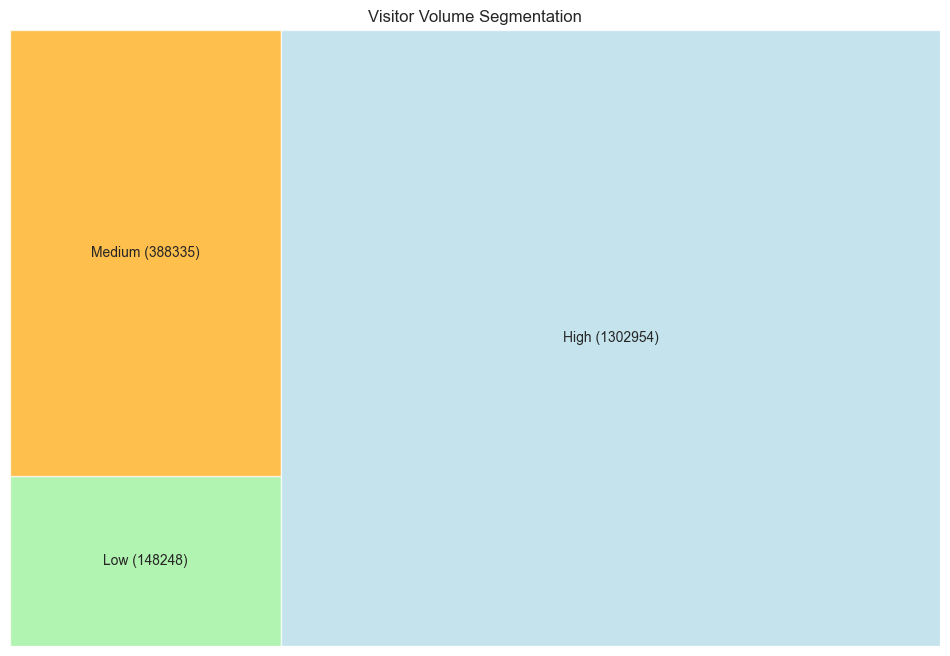

In [169]:
customer_copy = customer_df.copy()

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()
total_visitors_per_cinema['Volume Category'] = pd.qcut(total_visitors_per_cinema['Weekly Visitors'], 
                                                       3, labels=['Low', 'Medium', 'High'])

volume_per_category = total_visitors_per_cinema.groupby('Volume Category', observed=True)['Weekly Visitors'].sum().reset_index()

labels = volume_per_category.apply(lambda x: f"{x['Volume Category']} ({x['Weekly Visitors']})", axis=1)
sizes = volume_per_category['Weekly Visitors']
colors = ['lightgreen', 'orange', 'lightblue']

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, text_kwargs={'fontsize':10})
plt.axis('off')
plt.title('Visitor Volume Segmentation')
plt.show()

### High Volume Cinemas Weekly Visitors - Interactive Dashboard
The provided code snippet is part of an interactive dashboard designed using Python's Panel library to display the weekly visitor data of cinemas categorized as 'High', 'Medium' and 'Low' volume. The dashboard includes a selector for the volume category and dynamically updates the plot to show the weekly visitors for the selected cinemas. It uses the HoloViz hvPlot to generate the line plot and applies color coding for each cinema based on a predefined palette.

**Relevance:**
This visualization is significant as it allows stakeholders to focus on high-priority segments, in this case, high-volume cinemas, to analyze trends and make data-driven decisions. The interactivity enhances user engagement, providing a more insightful analysis by allowing selection and filtering based on specific categories of interest.

In [170]:
# pn.extension('tabulator', comms='vscode')

customer_copy = customer_df.copy()

customer_copy = customer_copy[customer_copy['Cinema ID'] != 'Total Weekly Visitors']

color_palette = cc.glasbey_dark

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum()

quantiles = total_visitors_per_cinema.quantile([0.33, 0.66]).values
cinema_volume_category = pd.cut(total_visitors_per_cinema, 
                                bins=[-np.inf, quantiles[0], quantiles[1], np.inf], 
                                labels=['Low', 'Medium', 'High'])

cinema_color_map = {cinema: color for cinema, color in zip(total_visitors_per_cinema.index, color_palette)}

volume_category_select = pn.widgets.Select(name='Volume Category', options=['High', 'Medium', 'Low'])

def get_interactive_plot(volume_category):
    selected_cinemas = cinema_volume_category[cinema_volume_category == volume_category].index
    df = customer_copy[customer_copy['Cinema ID'].isin(selected_cinemas)]
    
    unique_cinemas = df['Cinema ID'].unique()
    colors = [cinema_color_map[cid] for cid in unique_cinemas]
    
    return df.hvplot(x='Date', y='Weekly Visitors', by='Cinema ID', color=colors,
                     title=f'{volume_category} Volume Cinemas Weekly Visitors').opts(
                         min_height=400
                     )

@pn.depends(volume_category=volume_category_select.param.value)
def update_plot(volume_category):
    return get_interactive_plot(volume_category)

dashboard = pn.Column("# Cinema Performance Dashboard",
                      volume_category_select,
                      pn.panel(update_plot, sizing_mode='stretch_width'),
                      sizing_mode='stretch_width')

dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'26a2c6ec-d30b-4c63-ad34-579c4bcd6430': {'version…

### Individual Cinema Performance Dashboard - Interactive Visualization
This code constructs an interactive dashboard that allows users to visualize the weekly visitor data for a selected cinema over a specified date range. The dashboard is built using the Panel library, integrating hvPlot for plotting and widgets for interactivity. The plot function, `line_plot`, generates a line chart reflecting the weekly visitor trends for the chosen cinema. Users can filter the data using a drop-down for selecting a cinema and a date range slider to refine the period of interest.

**Relevance:**
This plot is crucial for analyzing specific performance metrics of individual cinemas, enabling stakeholders to drill down into granular visitor data over time. By adjusting the date range, one can examine the impact of certain events or seasons on visitor numbers, thereby facilitating targeted business strategies and marketing efforts.

In [171]:
# pn.extension('hvplot', comms='vscode')

customer_copy = customer_df.copy()
customer_copy['Date'] = pd.to_datetime(customer_copy['Date'])
customer_copy.reset_index(drop=True, inplace=True)


def line_plot(cinema_id, date_range):
    start_date = pd.to_datetime(date_range[0])
    end_date = pd.to_datetime(date_range[1])
    filtered_data = customer_copy[
        (customer_copy['Cinema ID'] == cinema_id) &
        (customer_copy['Date'] >= start_date) &
        (customer_copy['Date'] <= end_date)
    ]

    plot = filtered_data.hvplot.line(
        x='Date', 
        y='Weekly Visitors', 
        title=f'Weekly Visitors for Cinema {cinema_id}'
    ).opts(min_height=400)  # responsive=True, 
    
    return pn.panel(plot, sizing_mode='stretch_width')

cinema_id_select = pn.widgets.Select(name='Cinema ID', options=list(customer_copy['Cinema ID'].unique()))
date_range_slider = pn.widgets.DateRangeSlider(
    name='Date Range',
    start=customer_copy['Date'].min(),
    end=customer_copy['Date'].max(),
    value=(customer_copy['Date'].min(), customer_copy['Date'].max())
)

@pn.depends(cinema_id=cinema_id_select.param.value, date_range=date_range_slider.param.value)
def update_plot(cinema_id, date_range):
    return line_plot(cinema_id, date_range)

dashboard = pn.Column(
    pn.pane.Markdown("# Individual Cinema Performance Dashboard"),
    cinema_id_select,
    date_range_slider,
    update_plot,
    sizing_mode='stretch_width'
)

dashboard.servable(title='Cinema Performance Dashboard')

BokehModel(combine_events=True, render_bundle={'docs_json': {'4764fe18-917e-4b44-a3f1-6c070cf0e25c': {'version…

### High and Medium Volume Cinemas: Marketing Spend vs Average Spend - Scatterplot Analysis
The provided code merges data from two sources to analyze the relationship between marketing spend and average spend in high and medium volume cinemas. It categorizes cinemas based on visitor volumes and then visualizes this data using a scatterplot, with cinema volume categories color-coded and weekly visitor numbers represented by the size of each point. The plot shows if there's a correlation between marketing spend and average spend among cinemas with different visitor volumes.

**Relevance:**
This visualization is significant as it provides insight into the spending efficiency in high and medium volume cinemas. It can help in understanding whether increased marketing spend correlates with higher average customer spending, which is vital for making informed budgeting decisions. The size of the bubbles adds an additional layer of information about the impact of visitor volume on spending, allowing for a multifaceted analysis of investment returns.

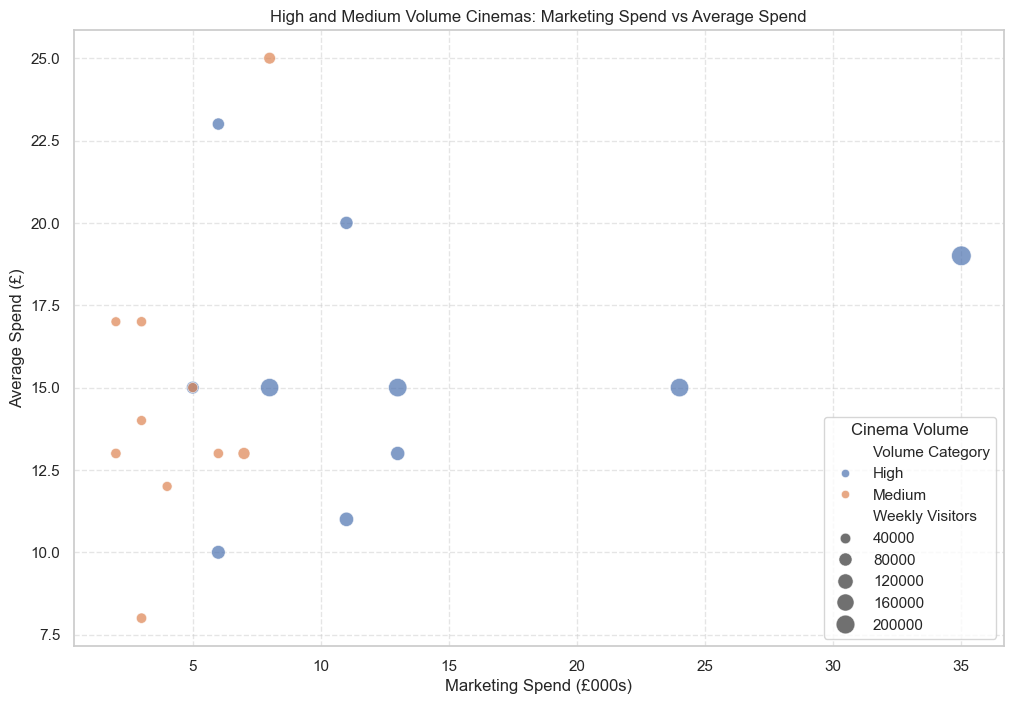

In [172]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

summary_with_visitors = summary_copy.merge(total_visitors_per_cinema, on='Cinema ID')

quantiles = summary_with_visitors['Weekly Visitors'].quantile([0.33, 0.66])

conditions = [
    summary_with_visitors['Weekly Visitors'] <= quantiles.iloc[0],
    summary_with_visitors['Weekly Visitors'] <= quantiles.iloc[1],
    summary_with_visitors['Weekly Visitors'] > quantiles.iloc[1]
]
choices = ['Low', 'Medium', 'High']
summary_with_visitors['Volume Category'] = np.select(conditions, choices, default='Low')

high_medium_volume_cinemas = summary_with_visitors[summary_with_visitors['Volume Category'].isin(['High', 'Medium'])]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=high_medium_volume_cinemas, x='Marketing Spend (£000s)', y='Average Spend (£)', hue='Volume Category', size='Weekly Visitors', sizes=(50, 200), alpha=0.7)
plt.title('High and Medium Volume Cinemas: Marketing Spend vs Average Spend')
plt.xlabel('Marketing Spend (£000s)')
plt.ylabel('Average Spend (£)')
plt.legend(title='Cinema Volume')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Weekly Visitors with Anomalies for Low Volume Cinemas - Time Series Anomaly Detection
The code aims to detect anomalies in weekly visitor data for cinemas with low visitor volumes. It calculates the z-score for the 'Weekly Visitors' data to identify points that are more than two standard deviations from the mean, which are classified as anomalies. These points are plotted over the time series data of weekly visitors for a specific low volume cinema, highlighting potential outliers that may indicate unusual activity or data errors.

**Relevance:**
This anomaly detection is crucial for recognizing significant deviations that could indicate special events, shifts in consumer behavior, or potential data recording errors. By visualizing these anomalies, business analysts and managers can investigate the causes behind these outliers and take appropriate actions or adjustments in their strategic planning or operational practices.

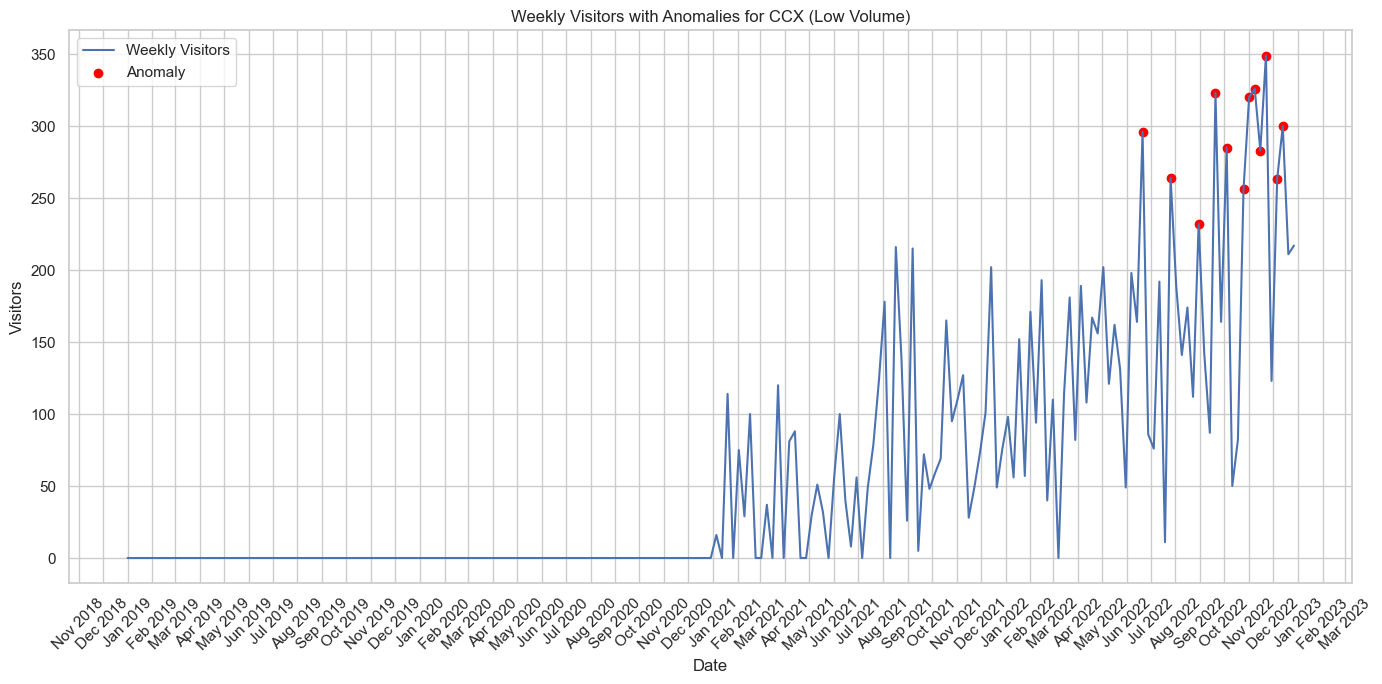

In [173]:
customer_copy = customer_df.copy()
summary_copy = summary_df.copy()

total_visitors = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()
total_visitors.rename(columns={'Weekly Visitors': 'Total Visitors'}, inplace=True)

summary_copy = summary_copy.merge(total_visitors, on='Cinema ID')
quantiles = summary_copy['Total Visitors'].quantile([0.33, 0.66])
summary_copy['Volume Category'] = pd.cut(summary_copy['Total Visitors'], bins=[-np.inf, quantiles.iloc[0], quantiles.iloc[1], np.inf], labels=['Low', 'Medium', 'High'])

low_volume_cinemas = summary_copy[summary_copy['Volume Category'] == 'Low']['Cinema ID']

low_volume_visitors = customer_copy[customer_copy['Cinema ID'].isin(low_volume_cinemas)]

def detect_anomalies(visitors_data):
    visitors_data['z_score'] = (visitors_data['Weekly Visitors'] - visitors_data['Weekly Visitors'].mean()) / visitors_data['Weekly Visitors'].std()
    anomalies = visitors_data[np.abs(visitors_data['z_score']) > 2]
    return anomalies

cinema_id = low_volume_cinemas.iloc[0]
cinema_data = low_volume_visitors[low_volume_visitors['Cinema ID'] == cinema_id].copy()
cinema_data.sort_values('Date', inplace=True)
anomalies = detect_anomalies(cinema_data)

plt.figure(figsize=(14, 7))
plt.plot(cinema_data['Date'], cinema_data['Weekly Visitors'], label='Weekly Visitors')
plt.scatter(anomalies['Date'], anomalies['Weekly Visitors'], color='red', label='Anomaly')
plt.title(f'Weekly Visitors with Anomalies for {cinema_id} (Low Volume)')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Cinema Lifecycle Visualization with Variations
The provided code creates a Gantt-like timeline plot using Plotly Express to visualize the lifecycle of cinemas, excluding those that started at the lowest date or ended at the highest date in the dataset. It filters the dataset to exclude cinemas without variations in their operating dates, then plots each cinema's operational period as a horizontal bar, color-coded by status (Running or Closed).

**Relevance:**
This visualization is relevant as it highlights the dynamic aspects of the cinema business by showing new openings and closures over time, providing insights into business growth and market changes. This can aid strategic decision-making regarding investment and resource allocation.

In [174]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

summary_copy['Start Date'] = pd.to_datetime(summary_copy['Start Date'])
summary_copy['End Date'] = pd.to_datetime(summary_copy['End Date'])

lowest_date = customer_copy['Date'].min()

highest_date = customer_copy['Date'].max()

filtered_summary = summary_copy[(summary_copy['Start Date'] != lowest_date) | (summary_copy['End Date'] != highest_date)]

fig = px.timeline(filtered_summary, x_start="Start Date", x_end="End Date", y="Cinema ID", color="Status", title="Cinema Lifecycle (with Variations)")
fig.update_yaxes(categoryorder="total ascending")
fig.show()

### Comprehensive Cinema Lifecycle Timeline
The code snippet generates a Plotly timeline chart visualizing the start and end dates for all cinemas in the dataset, representing their entire operational lifespans. The chart uses different colors to distinguish between currently running and closed cinemas, with each cinema's ID listed on the y-axis and the timeline spread across the x-axis.

**Relevance:**
This timeline offers a comprehensive view of the operational history of the cinemas, allowing for a quick assessment of their longevity and changes in operational status over time. It serves as a strategic tool for understanding market trends, business durations, and the impact of external factors on cinema operations.

In [175]:
summary_copy = summary_df.copy()

fig = px.timeline(summary_copy, x_start="Start Date", x_end="End Date", y="Cinema ID", color="Status", title="All Cinema Lifecycle")
fig.update_yaxes(categoryorder="total ascending")
fig.show()

### Operational Duration of Cinemas
The provided code snippet creates a horizontal bar chart illustrating the number of days each cinema was open. It calculates the duration by subtracting the 'Start Date' from the 'End Date' for each cinema and presents this data in a clear, visual format, with each bar's length corresponding to the total days of operation.

**Relevance:**
This visualization highlights the operational longevity of each cinema in a straightforward manner, making it easy to identify which cinemas have been operational for longer periods. Such a visualization can be crucial for analyzing business stability and success over time.

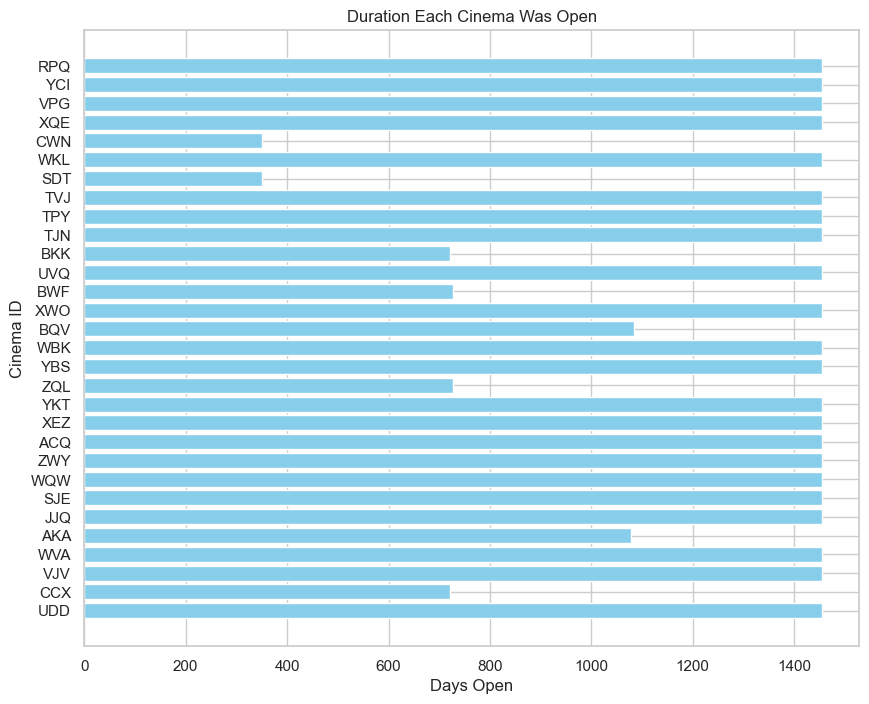

In [176]:
summary_copy = summary_df.copy()

summary_copy['Duration'] = (summary_copy['End Date'] - summary_copy['Start Date']).dt.days

plt.figure(figsize=(10, 8))
plt.barh(summary_copy['Cinema ID'], summary_copy['Duration'], color='skyblue')
plt.xlabel('Days Open')
plt.ylabel('Cinema ID')
plt.title('Duration Each Cinema Was Open')
plt.show()

### Tracking Cinema Openings and Closures
The code produces a scatter plot that contrasts the opening and closing dates for a list of cinemas. Green dots mark the dates each cinema opened, while red dots signify when they closed, effectively offering a timeline of the operational status for each venue.

**Relevance:**
This plot provides valuable insights into the dynamics of cinema operations over time, which can be used to identify patterns in the business lifecycle of cinemas, assess the impact of external events on operations, and plan for future resource allocation or investments.

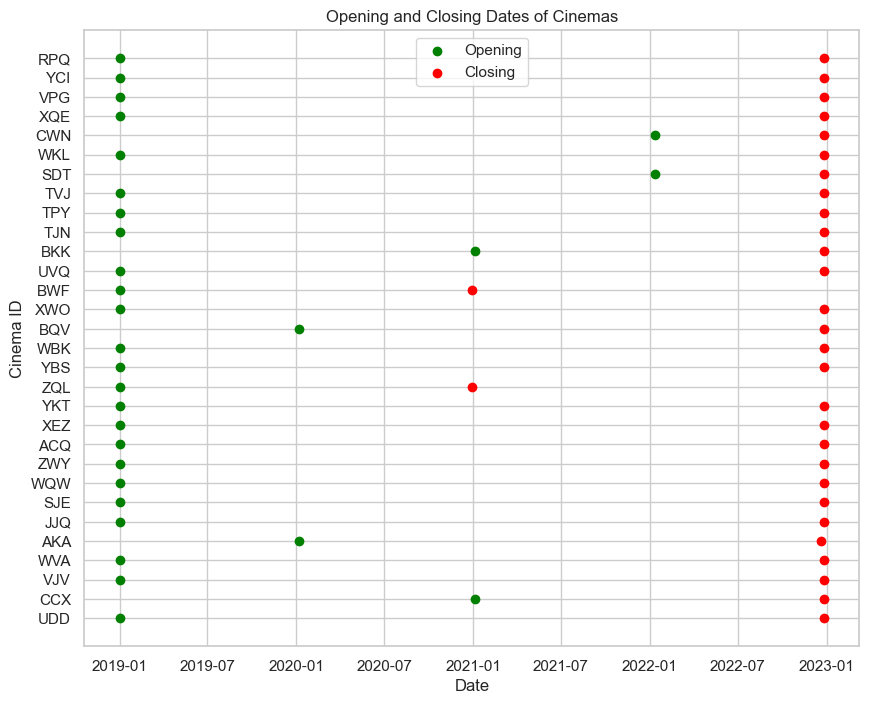

In [177]:
summary_copy = summary_df.copy()

plt.figure(figsize=(10, 8))
plt.scatter(summary_copy['Start Date'], summary_copy['Cinema ID'], color='green', label='Opening')
plt.scatter(summary_copy['End Date'], summary_copy['Cinema ID'], color='red', label='Closing')
plt.legend()
plt.title('Opening and Closing Dates of Cinemas')
plt.xlabel('Date')
plt.ylabel('Cinema ID')
plt.show()